In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.lines import Line2D

import xspec as x
import os

#%matplotlib notebook

Defining functions to draw $E \ (T)$:

In [2]:
def f(temperature, eMean, tList): 
    
    # <E> = f(T)
    #returns energy
    
    return eMean[np.argmin(np.abs(tList - temperature))]

    
def f_inv(energy, eMean, tList): 
    
    # T = f^(-1) (<E>)
    #returns temperature
    
    return tList[np.argmin(np.abs(eMean - energy))]
    
    
def get_data(dataName, show_table=False):
    
    # extracts data obtained from stats.sh
    # dataName is stats_NN.dat

    headers = [ 'Flux', 'Abund', 'T', 'z', 'n_H', 'Chnls', '$E_{min}$', '$E_{max}$', '$E_{sum}$', 'cs', 'ecs' ] 
    table = pd.read_csv(dataName, sep = ' ', names = headers)
    
    # adding column with E_mean
    
    table['$E_{mean}$'] = table['ecs']/table['cs']
    
    if show_table:
        display(table)
        
    # returns table as numpy array (?)
    
    return table.to_numpy().astype(float)
    

def plot_E_T(dataName, spectra_type, telescope):
    
    # plotting <E>(T) as in Fig.2 for given dataName
    # you should add spectra type and telescope name by yourself
    
    # possible values:
    # spectra_type = 'Line' or sectra_type = 'Continuum'
    # telescope = 'Chandra' or telescope = 'SRG/eROSITA'

    #print(dataName)
    #headers = [ 'Flux', 'Abund', 'T', 'z', 'n_H', 'Chnls', '$E_{min}$', '$E_{max}$', '$E_{sum}$', 'cs', 'ecs' ] 
    #table = pd.read_csv(dataName, sep = ' ', names = headers)
    #adding column with E_mean
    #table['$E_{mean}$'] = table['ecs']/table['cs'] 
    #data = table.to_numpy().astype(float)
    
    data = get_data(dataName, show_table=False)
    
    e_mean = data[:,11]
    temp = data[:,2]
    
    # taking first ever values of corresponding characteristics 
    
    #abundance = table['Abund'].to_numpy().astype(float)[0]
    #absorption = table['n_H'].to_numpy().astype(float)[0]
    #redshift = table['z'].to_numpy().astype(float)[0]
    
    abundance = data[0, 1]
    absorption = data[0, 4]
    redshift = data[0, 3]
    
    plt.plot(temp, e_mean, linewidth = 3, label = spectra_type + ', ' + telescope)
    
    plt.ylim(0, 3)
    plt.xlabel('Temperature (keV)', fontsize = 15)
    plt.ylabel('Average energy (keV)', fontsize = 15)
    plt.title(spectra_type + '-dominated spectra (' + telescope + 
              ') \n $n_H =' + str(absorption) + '\cdot 10^{22} \ cm^{-2}$; z = ' + 
              str(redshift), fontsize = 15) # +'; Z = '+str(abundance)+' Solar units')
    plt.xticks(size=15)
    plt.yticks(size=15)
    plt.xscale('log')
    #plt.yscale('log')
    #plt.grid()
    plt.legend(fontsize = 15, loc=2)

    #return data[:,11], data[:,2]
    #return e_mean, temp
    
def add_T(Tmin, Tmax, dataName):
    
    # adding vertical lines for given temperatures
    # and horizontal lines for corresponding energies
    
    data = get_data(dataName, show_table=False)
    
    eMean = data[:,11]
    tList = data[:,2]
    
    plt.axvline(Tmin, linewidth=3, linestyle="--", color='red')
    plt.axvline(Tmax, linewidth=3, linestyle="--", color='green')
    
    #E_min = e_mean[np.argmin(np.abs(temp - Tmin))]
    #E_max = e_mean[np.argmin(np.abs(temp - Tmax))]
    E_min = f(Tmin, eMean, tList)
    E_max = f(Tmax, eMean, tList)
    
    print('E_max =', round(E_max,2), 'keV')
    print('E_min =', round(E_min,2), 'keV')
    
    plt.axhline(E_min, linewidth=3, linestyle="--", color='red', label='$E_{min}, T_{min}$')
    plt.axhline(E_max, linewidth=3, linestyle="--", color='green', label='$E_{max}, T_{max}$')
    
    plt.legend(fontsize=15, loc = 4)

Построим графики зависимости средних энергий от температуры для различных спектров и телескопов. Эти зависимости получены в результате выполнения скрипта `stats.sh`.

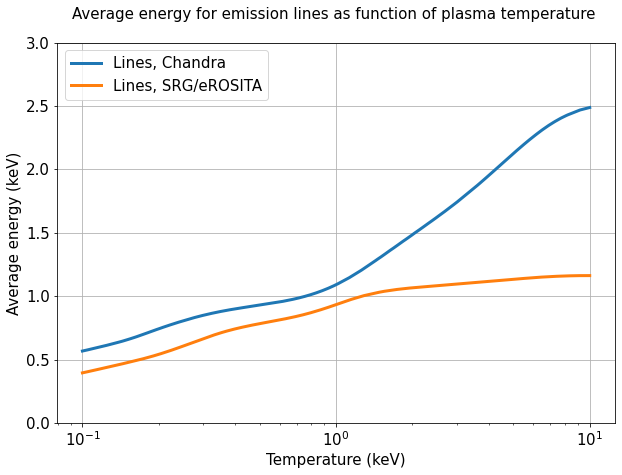

In [3]:
plt.figure(figsize=(10,7))

data_name1 = "data/stats_03.dat"   #'Lines, CH'
data_name2 = "data/stats_11.dat"   #'Cont, CH'
data_name3 = "data/stats_10.dat"   #'Lines, ER'
data_name4 = "data/stats_13.dat"   #'Cont, ER'
data_name5 = "data/stats_07.dat"   #'Lines, ER'
data_name6 = "data/stats_12.dat"   #'Lines, ER'

plot_E_T(data_name1, 'Lines', 'Chandra')
#plot_E_T(data_name2, 'Continuum', 'Chandra')
plot_E_T(data_name3, 'Lines', 'SRG/eROSITA')
#plot_E_T(data_name4, 'Continuum', 'SRG/eROSITA')
#plot_E_T(data_name6, 'Line2', 'er')


#for i in ['02', '03', '05', '08', '14', '15', '04', '16']:
#        dn = "data/stats_"+str(i)+".dat"
#        plot_E_T(dn, str(i), 'Chandra')

        
#plt.xscale('linear')

#add_T(1.0, 3.0, data_name1)

# comment if there is only one E(T)
# this move deletes unique titles
plt.title('Average energy for emission lines as function of plasma temperature \n', fontsize=15)
plt.grid()
#plt.savefig('letter26.10/Fig2.png')
plt.show()

# LINES ONLY

В этом блоке представлен алгоритм для вычисления $T_{spec}$ по спектрам (с преобладанием линий) двухкомпонентной плазмы разными способами и отображения его как на Рис.3 из публикации Вихлинина.

Алгоритм вычисления $T_{spec}$ по графикам $E \ (T)$ согласно формулам (1-3):

In [4]:
def get_Tspec_lines(fmin, Tmin, Tmax, Data):
    
    # derive T_spec from given values 
    # of T_min, T_max, f_min and for given <E>(T)

    E_1 = f(Tmin, Data[:,11], Data[:,2])
    E_2 = f(Tmax, Data[:,11], Data[:,2])

    S_j_1 = Data[np.argmin(np.abs(Data[:,2] - Tmin)), 9]
    S_j_2 = Data[np.argmin(np.abs(Data[:,2] - Tmax)), 9]
    
    #print(Data[np.argmin(np.abs(tList - Tmin)),9], Data[np.argmin(np.abs(tList - Tmax)),9])
    #print()

    num =    fmin*S_j_1*E_1 + (1-fmin)*S_j_2*E_2
    denom =  fmin*S_j_1     + (1-fmin)*S_j_2
    
    #Etot = num/denom
    #Tspec = f_inv(Etot, Data[:,11], Data[:,2])
    #plt.scatter(fmin, Tspec, color="blue")

    return f_inv(num/denom, Data[:,11], Data[:,2])


def plot_Tspec_fmin(Tmin, Tmax, N_fmins, Data, naive=False, lstyle = '-', cline = 'blue'):

    # draw plot like Fig.3

    f_min = np.linspace(0, 1, N_fmins+1)
    
    #naive weighting
    if naive:
        plt.plot(f_min, f_min*T_min+(1-f_min)*T_max, linestyle = '--', linewidth=2, color='black')

    T_spec = f_min*0

    for i in range(0, len(f_min)):

        T_spec[i] = get_Tspec_lines(f_min[i], T_min, T_max, Data)

    #print('*************')

    plt.plot(f_min, T_spec, linewidth=2, linestyle = lstyle, color = cline)
    #, label='eq. [1-3]')#'from '+str(T_max)+' to '+str(T_min))

def plot_Tspec_fmin_details():  
    
    plt.xticks(size=15)
    plt.yticks(size=15)
    plt.xlabel('$f_{min}$', fontsize = 15)
    plt.ylabel('$T_{spec}$ (keV)', fontsize = 15)
    
    handles, labels = plt.gca().get_legend_handles_labels()
    line_n = Line2D([], [], label='Naive weighting', color='black', linestyle='--', linewidth=2)
    line_e = Line2D([], [], label='$T_{spec}$ from eq. [1-3]', color='blue', linestyle='-', linewidth=2)
    dots_f = Line2D([], [], label='Single-T fit', color='black', marker='.', linestyle='None', markersize=12)
    handles.extend([line_n, line_e, dots_f])
    plt.legend(handles=handles, fontsize=15)

## PyXspec

Defining a function that calculates single-temperature fit for two-component plasma (with line-dominated spectra) of temperatures $T_{min}$ and $T_{max}$ and relative contributions $f_{min}$ and $f_{max}$ respectively.

Note: to get rid of trace elements for pure bremsstrahlung use `xset APEC_TRACE_ABUND 0`.

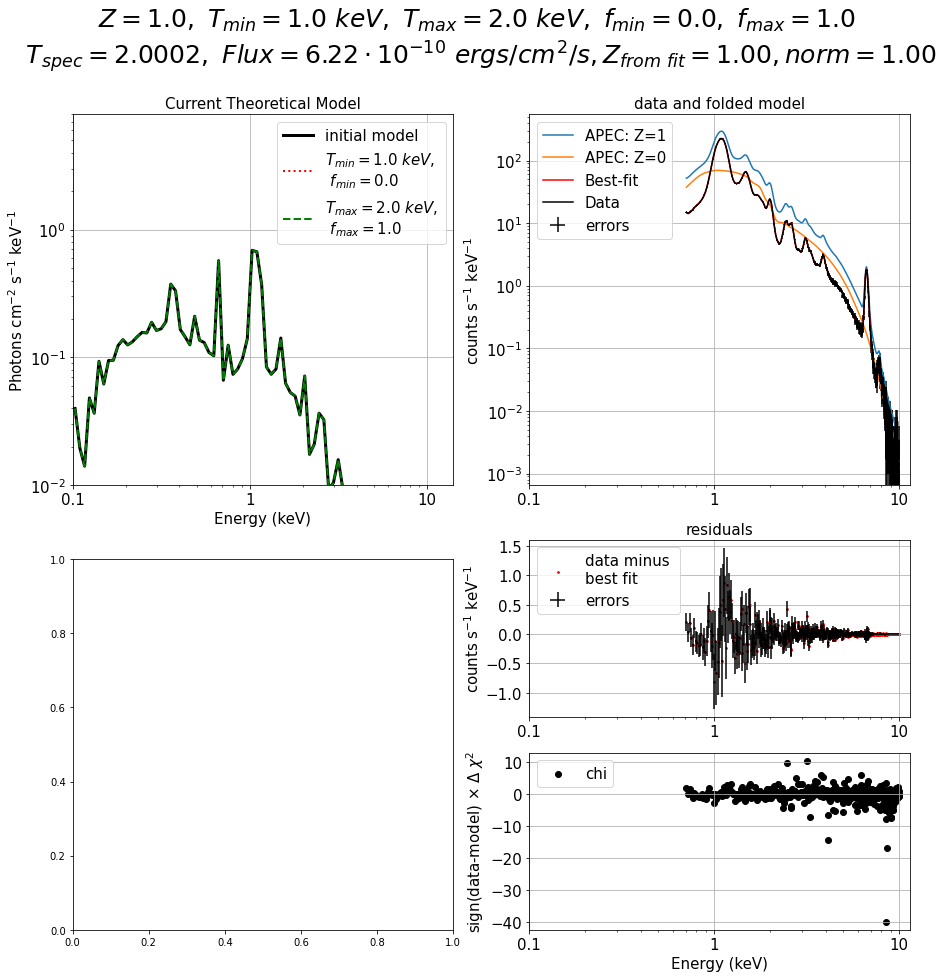

Plot command list is now empty


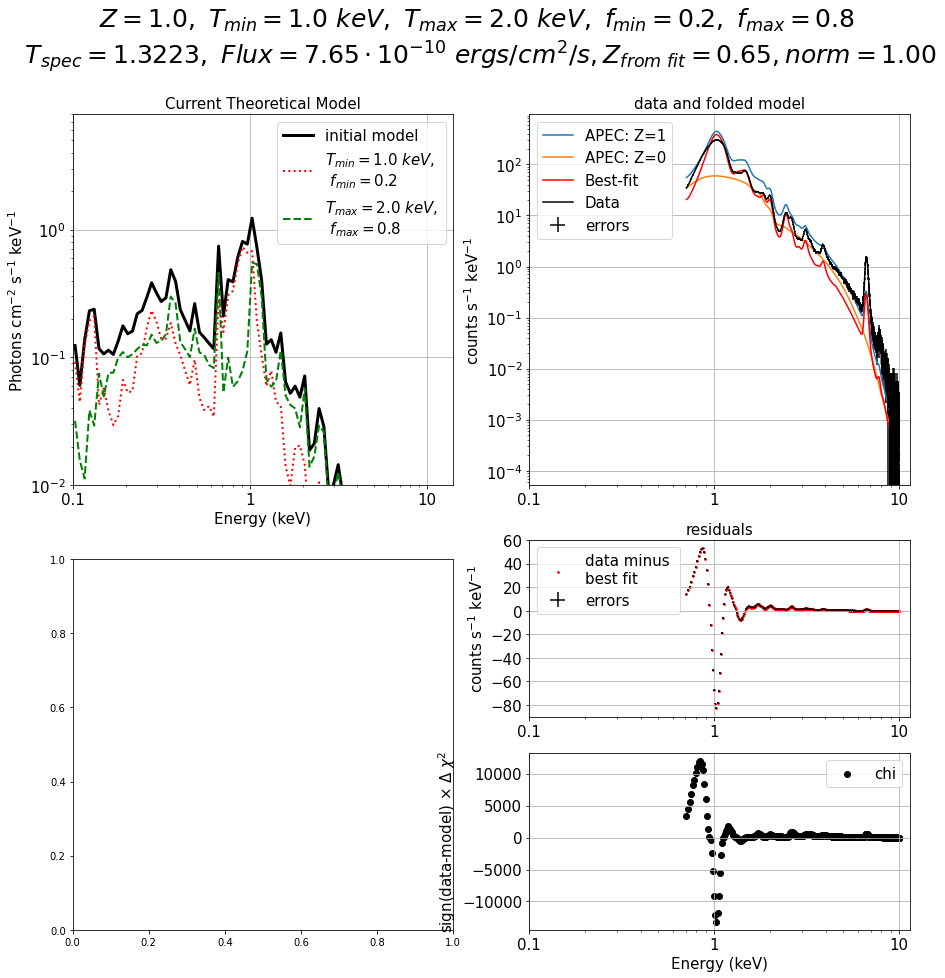

Plot command list is now empty


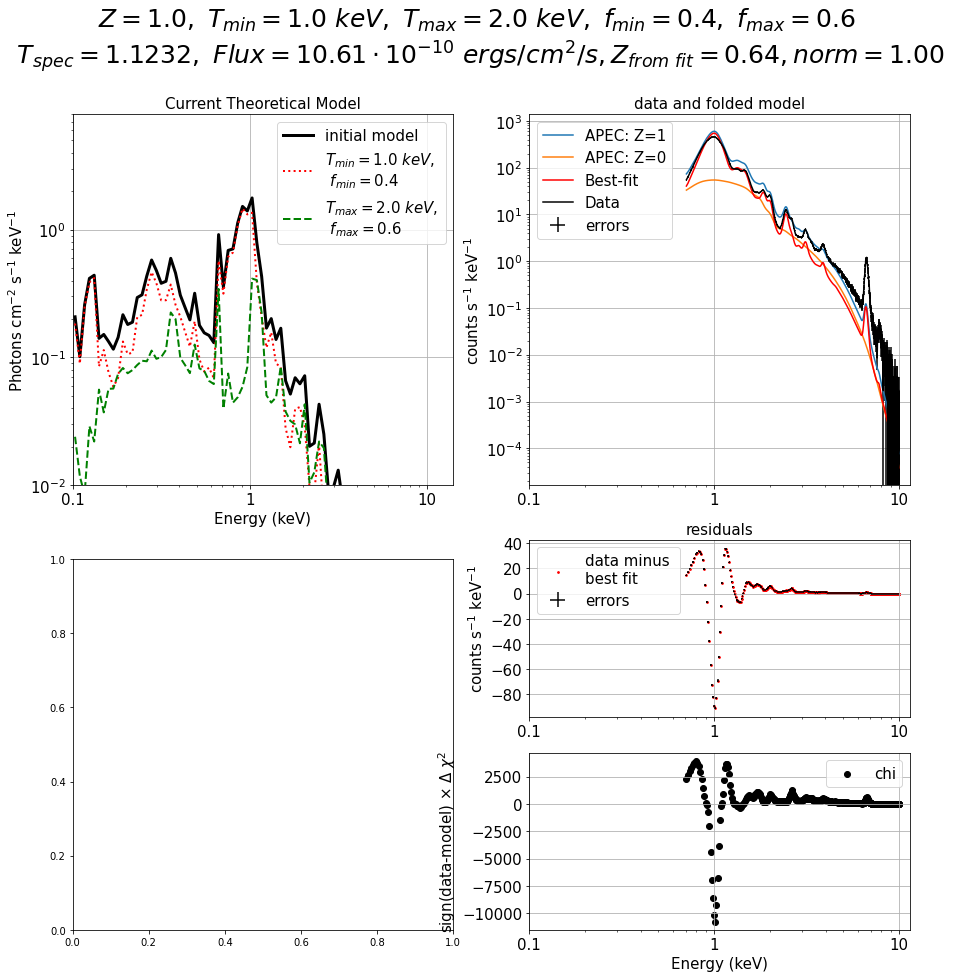

Plot command list is now empty


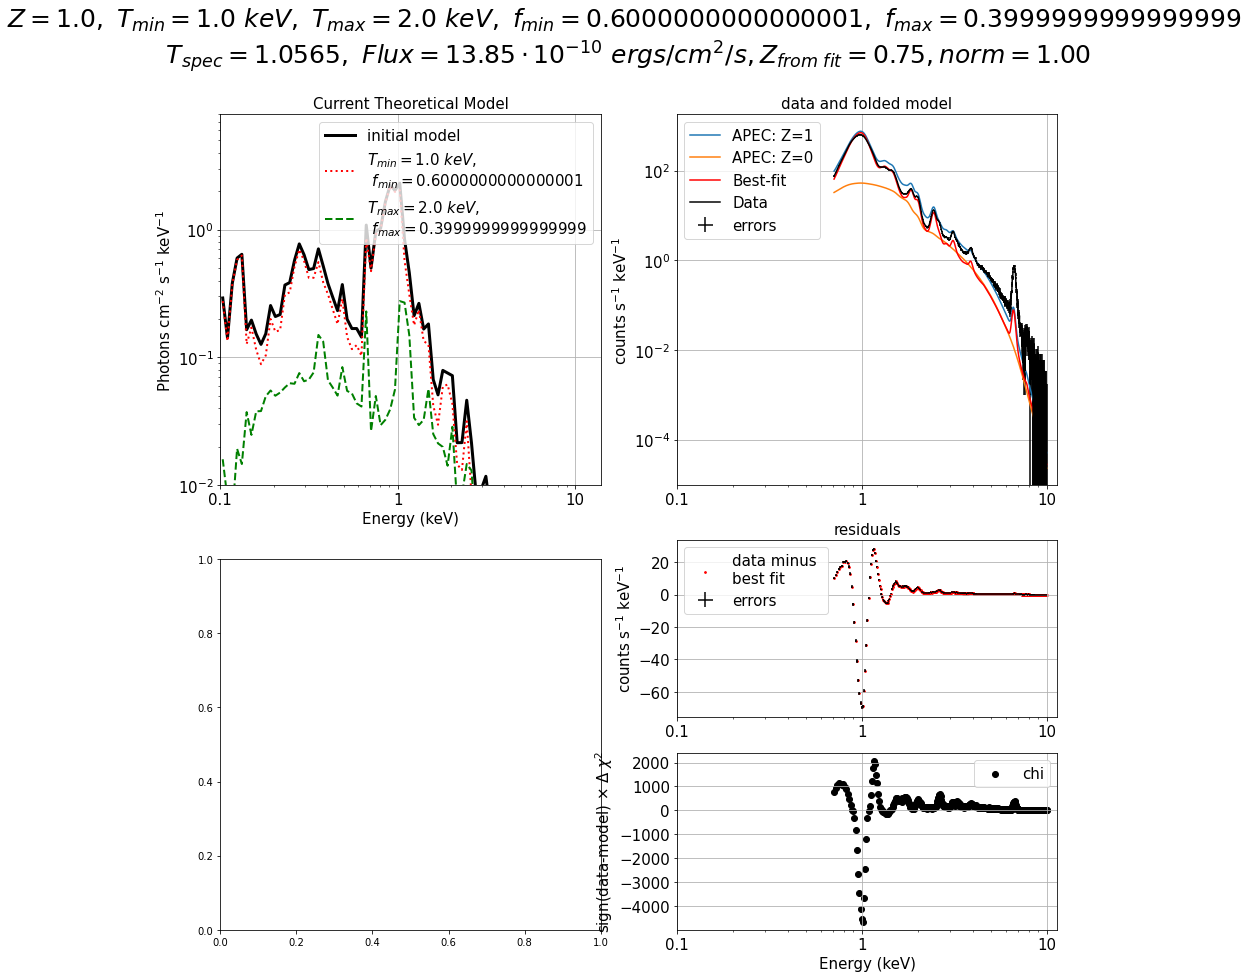

Plot command list is now empty


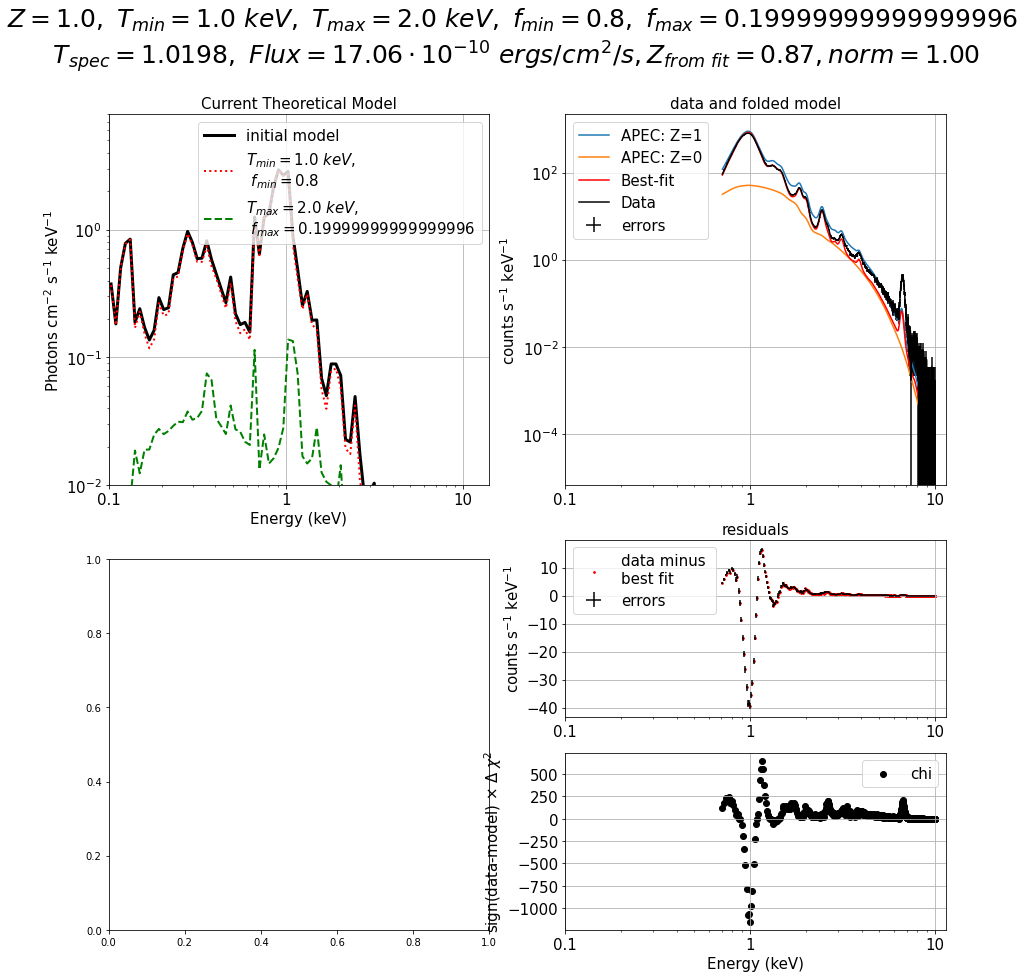

Plot command list is now empty


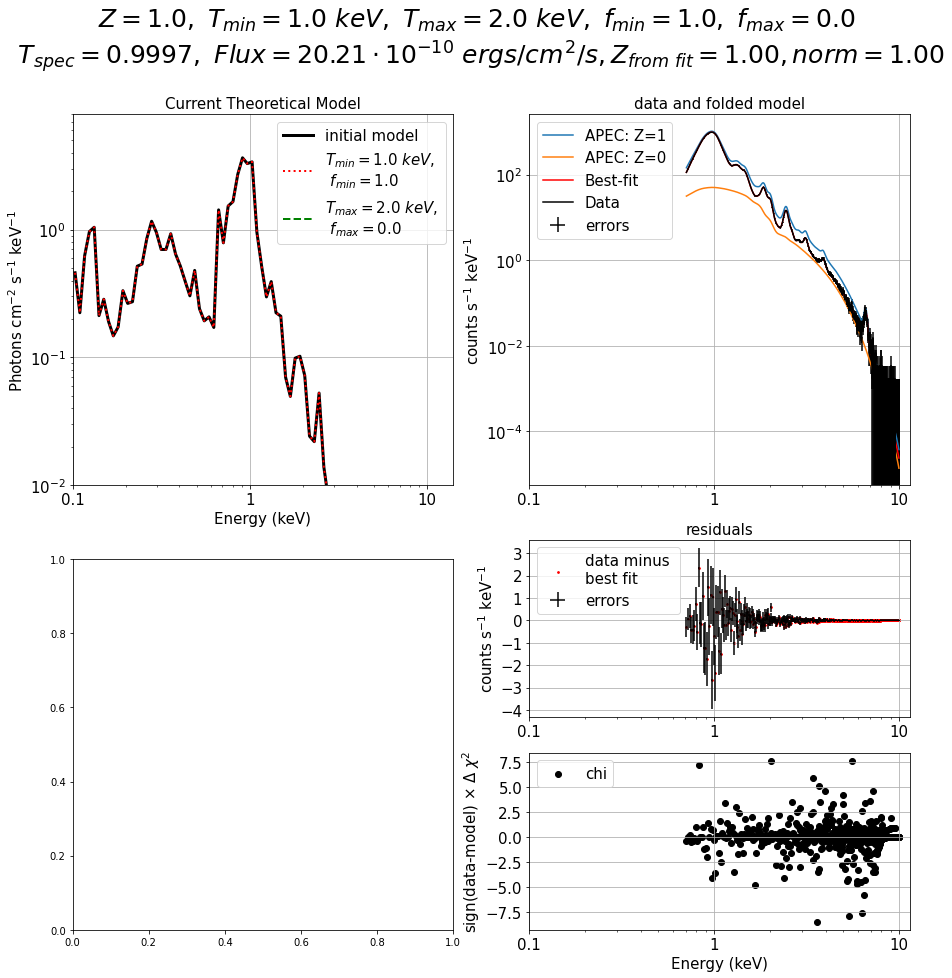

Plot command list is now empty
T:  [2.0001789600208593, 1.3222876317021472, 1.1231828992243147, 1.05648063294175, 1.0198444228337176, 0.9997143874301562]
F:  [6.216818718669667e-10, 7.653816147161571e-10, 1.0611736936430441e-09, 1.3849477905315218e-09, 1.7055942107417257e-09, 2.0211545690852872e-09]


In [31]:
def print_parnames(MODEL):
    
    ncomp = len(MODEL.componentNames)
    for icomp in MODEL.componentNames:
        print (icomp, eval(f'MODEL.{icomp}.parameterNames'))

#mod2fit111 = x.Model("phabs*(apec+const*apec)")
#print_parnames(mod2fit111)

def single_T_fit_lines(T_minnn, T_maxxx, N_fmins, abund, telescope_name, plot=False, Xplot=False):
    
    x.AllData.clear()
    x.AllData.removeDummyrsp()
    x.AllData.dummyrsp(lowE=0.1, highE=50.0, nBins=100)
    x.Xset.addModelString("APEC_TRACE_ABUND", "0")
    
    if telescope_name == 'Chandra':
        RMF_NAME = 'telescopes/chandra/djs50.ugc3957_v05.rmf' 
        ARF_NAME = 'telescopes/chandra/djs50.ugc3957_v05.arf' 
    elif telescope_name == 'SRG/eROSITA':
        RMF_NAME = 'telescopes/erosita/erosita_pirmf_v20210719.rmf'
        ARF_NAME = 'telescopes/erosita/tm1_arf_open_000101v02.fits'
    
    if Xplot:
        x.Plot.device = "/xs"
    else:
        x.Plot.device = '/null'

    tspec_list = []
    flux_list = []
    abund_list = []

    for l in range(0, N_fmins):
        
        f_minnn = 0.0+1/(N_fmins-1)*(l)
        f_maxxx = 1-f_minnn
        #f_minnn, f_maxxx = f_maxxx, f_minnn
        
        # set model for fakeit
        mod = x.Model('phabs*(const*(apec+const*apec)+const*(apec+const*apec))')
        mod.setPars(0.01, f_minnn, T_minnn, abund, 0, 1, 1., T_minnn, 0.0, 0, 1, f_maxxx, T_maxxx, abund, 0, 1, 1., T_maxxx, 0, 0, 1)
        #x.AllModels.show()
        mod(7).values =  "-1, 0.0001, -1, -1, 1, 1"
        mod(17).values = "-1, 0.0001, -1, -1, 1, 1"
        mod(7).frozen = True
        mod(17).frozen = True
        mod(8).link = "3"
        mod(10).link = "5"
        mod(11).link = "6"
        mod(18).link = "13"
        mod(20).link = "15"
        mod(21).link = "16"
        x.AllModels.show()
        #x.Plot.show()
        
        #x.AllModels.setEnergies("0.1 10.0 10 log")
        x.AllModels.setEnergies("reset")
        
        #x.AllModels.calcFlux('0.7 10.0')
        #print("lines: ", mod.flux)
        #fluxx = mod.flux[0]
        #flux_list.append(fluxx) # in units of erg / s / cm^2
        # or use [4] in units of photons / s / cm^2
        
        if plot:
            
            plt.figure(figsize=(15, 15))
            
            plt.subplot(2,2,1)
            x.Plot("model")
            x.Plot.add = True
            #x.Plot.setID()
            xVals = x.Plot.x()
            modVals = x.Plot.model()
            yAdd1 = x.Plot.addComp(1)
            yAdd2 = x.Plot.addComp(2)
            yAdd3 = x.Plot.addComp(3)
            yAdd4 = x.Plot.addComp(4)
            yAdd12 = [a+b for a,b in zip(yAdd1, yAdd2)]
            yAdd34 = [c+d for c,d in zip(yAdd3, yAdd4)]
            plt.plot(xVals, modVals, linewidth = 3, label='initial model', color='black')
            plt.plot(xVals, yAdd12, linewidth = 2, linestyle = ":", 
                     label=f'$T_{{min}}={T_minnn} \ keV$, \n $f_{{min}}={f_minnn}$', color='red')
            plt.plot(xVals, yAdd34, linewidth = 2, linestyle = "--", 
                     label=f'$T_{{max}}={T_maxxx} \ keV$, \n $f_{{max}}={f_maxxx}$', color='green')
            #plt.plot(xVals, [c+d for c,d in zip(yAdd12, yAdd34)], label='sum')
            #plt.plot(xVals, yAdd3, label='3')
            #plt.plot(xVals, yAdd4, label='4')
            plt.xscale('log')
            plt.yscale('log')
            plt.xlim(0.1, 14)
            plt.ylim(0.01, 8)
            plt.legend(fontsize = 15, loc=1)
            add_plt_fancy()
            #plt.show()

        # fake spectrum
        fs = x.FakeitSettings(response = RMF_NAME, 
                                   arf = ARF_NAME, 
                            background = '', 
                              exposure = '40000', 
                            correction = '', 
                          backExposure = '', 
                              fileName = 'fakeit.pha')
        x.AllData.fakeit(nSpectra = 1, 
                         settings = fs, 
                       applyStats = True,
                       filePrefix = "",
                          noWrite = True)
        
        x.AllData.ignore("**-0.7 10.0-**")             # IMPORTANT !
        #x.Plot("data")
        x.AllData.show()

        # fitting
        #x.AllModels.clear()
        mod2fit = x.Model("phabs*(apec+const*apec)")
        mod2fit.setPars(0.01, 1.0, abund, 0., 1, 1, 1., 0.0, 0.0, 1)
        mod2fit(6).values = "-1, 0.0001, -1, -1, 1, 1"
        mod2fit(6).frozen = True
        mod2fit(1).frozen = True    # n_H 
        mod2fit(3).frozen = False   # abundance
        #print(mod2fit(5).values)
        #mod2fit(4).frozen = False   # redshift
        mod2fit(5).frozen = True    # norm
        mod2fit(5).values = "1, -1, 0.0, 0.0, 1.1, 1.1"
        mod2fit(7).link = "2"
        mod2fit(8).frozen = True
        mod2fit(9).link = "4"
        mod2fit(10).link = "5"
        #mod2fit(5).frozen = True
        
        #print_parnames(mod2fit)
        
        x.AllData.ignore("bad")
        x.Fit.renorm('auto')
        x.Fit.nIterations = 100
        x.Fit.query = 'yes'
        x.Fit.weight = 'standard' # 'churazov'
        x.Fit.statMethod = "chi"
        #x.Fit.delta = 0.001
        x.Fit.perform()
        #x.Fit.goodness(100, sim=False)
        #x.Xset.parallel.error = 2
        #x.Fit.error("2 3")
        #print(mod2fit(2).error)
        #print(mod2fit(3).error)
        #print(mod2fit(5).error)
        
        #best_kT = mod2fit(2).values[0]
        #abund_from_fit = mod2fit(3).values[0]
        #x.Fit.steppar(f"2 {best_kT-0.02} {best_kT+0.02} 20 3 {abund_from_fit-0.01} {abund_from_fit+0.01} 20") #0.02 5")# 3 delta 0.02 5")
        
        #x.Plot.commands = ()
        
        #x.Plot.device = "/xs"
        #x.Plot("contour")
        #x.Plot.contourLevels()
        #x.Plot.device = "/null"
        
        #x.Fit.perform()
        #x.AllModels.show()
        x.Fit.show()
        
        best_kT = mod2fit(2).values[0]
        abund_from_fit = mod2fit(3).values[0]
        norm = mod2fit(5).values[0]
        abund_list.append(abund_from_fit)
        tspec_list.append(best_kT)
        #print(best_kT)
        
        x.AllModels.calcFlux('0.7 10.0')
        fluxx = x.AllData(1).flux[0]
        #print(x.AllData(1).flux)
        flux_list.append(fluxx) # in units of ergs/cm2/s
    
        #x.Fit.statMethod = 'cstat'
        # about statistic in xspec:
        # https://heasarc.gsfc.nasa.gov/xanadu/xspec/manual/node119.html
        # about steppar:
        # https://heasarc.gsfc.nasa.gov/xanadu/xspec/manual/node86.html
        # about error:
        # https://heasarc.gsfc.nasa.gov/xanadu/xspec/manual/node79.html
        # error codes:
        # https://heasarc.gsfc.nasa.gov/xanadu/xspec/manual/node60.html#tclouterror
        
        if plot:
            
            plt.suptitle(f'$Z ={abund}, \ T_{{min}}={T_minnn} \ keV, \ T_{{max}}={T_maxxx} \ keV, \ f_{{min}}={f_minnn}, \ f_{{max}}={f_maxxx}$ \n $T_{{spec}}={best_kT:.4f}, \ Flux = {fluxx*10**10:.2f}\cdot 10^{{-10}} \ ergs/cm^2/s, Z_{{from \ fit}} = {abund_from_fit:.2f}, norm = {norm:.2f}$ \n', fontsize = 25)
            
            plt.subplot(2,2,3)
            #x.Plot("model")
            #modVals = x.Plot.model()
            #xVals = x.Plot.x()
            #y1 = x.Plot.addComp(1)
            #y2 = x.Plot.addComp(2)
            #plt.plot(xVals, y1, label="APEC: Z=1")
            ##plt.plot(xVals, y2, label="2")
            ##plt.plot(xVals, [c+d for c,d in zip(y1, y2)], label='sum')
            #plt.plot(xVals, [-aa for aa in y2], label='APEC: Z=0')
            #plt.plot(xVals, modVals, label="Best-fit", color='black')
            #plt.xscale('log')
            #plt.yscale('log')
            #plt.xlim(0.1, 14)
            #plt.ylim(0.01, 8)
            #add_plt_fancy()
            ##plt.title("Best-fit model")
            ##plt.show()
            
            #x.Plot("goodness")
            #xValsG = x.Plot.x()
            #yValsG = x.Plot.y()
            ##print(xValsG, yValsG)
            ##plt.hist(yValsG, bins=xValsG)
            #plt.bar(xValsG, height=yValsG, width = (np.min(xValsG)-np.max(xValsG))/len(xValsG))
            ##plt.plot(xValsG, yValsG, label="goodness")
            #plt.xlabel(x.Plot.labels()[0], fontsize = 15)
            #plt.ylabel(x.Plot.labels()[1], fontsize = 15)
            #plt.title(x.Plot.labels()[2], fontsize = 15)
            #plt.xticks(size=15)
            #plt.yticks(size=15)
            #plt.grid()
            #plt.axvline(x.Fit.statistic, linestyle = "--", color='red', linewidth = 3)
            
        if plot:
            
            plt.subplot(2,2,2)
            x.Plot("data")
            x.Plot.xAxis = "keV"
            x.Plot.add = True
            xVals = x.Plot.x()
            yVals = x.Plot.y()
            y1 = x.Plot.addComp(1)
            y2 = x.Plot.addComp(2)
            modVals = x.Plot.model()
            #plt.plot(xVals, modVals, linewidth = 5, color = 'green')
            plt.yscale('log')
            plt.plot(xVals, y1, label="APEC: Z=1")
            plt.plot(xVals, [-aa for aa in y2], label="APEC: Z=0")
            summa = [c+d for c,d in zip(y1, y2)]
            plt.plot(xVals, summa, label='Best-fit', color='red') #modVals = summa
            plt.plot(xVals, yVals, label='Data', color='black') 
            xErrs = x.Plot.xErr()
            yErrs = x.Plot.yErr()
            plt.errorbar(xVals, yVals, yErrs, xErrs, 
                         fmt = "none", ecolor = "black", label="errors")
            add_plt_fancy()
            plt.xlabel("")
            
            plt.subplot(4,2,6)
            x.Plot("resid")
            #plt.subplot(2,2,4)
            xValsR = x.Plot.x()
            yValsR = x.Plot.y()
            xErrsR = x.Plot.xErr()
            yErrsR = x.Plot.yErr()
            plt.errorbar(xValsR, yValsR, yErrsR, xErrsR, 
                         fmt = "none", ecolor = "black", label="errors")
            plt.scatter(xValsR, [a-b for a,b in zip(yVals, summa)], s=3, 
                        color='red', label='data minus \nbest fit')
            add_plt_fancy()
            plt.xlabel("")
            
            plt.subplot(4,2,8)
            x.Plot("chi")
            #plt.subplot(2,2,4)
            xValsC = x.Plot.x()
            yValsC = x.Plot.y()
            #xErrsR = x.Plot.xErr()
            #yErrsR = x.Plot.yErr()
            plt.scatter(xValsC, yValsC, color = "black", label="chi")
            add_plt_fancy()
            plt.title("")
            
            #finally
            plt.show()
            
        #x.Plot("model data resid")
        x.Plot.commands=()
        x.AllData.clear()
        x.AllModels.clear()
        
    #print("Z: ", abund_list)

    return tspec_list, flux_list

#def add_background():
        #x.Plot("data")
        #bkg = x.Plot.backgroundVals()
        #plt.plot(xVals, yVals)
        
def add_plt_fancy():
    plt.xlabel(x.Plot.labels()[0], fontsize = 15)
    plt.ylabel(x.Plot.labels()[1], fontsize = 15)
    plt.title(x.Plot.labels()[2], fontsize = 15)
    plt.xticks(size=15)
    plt.yticks(size=15)
    plt.grid()
    plt.xscale('log')
    plt.xticks([0.1, 1., 10.], [0.1, 1, 10])
    plt.legend(fontsize=15, loc=0)

fitlisttttt, fluxxxx = single_T_fit_lines(1.0, 2.0, 6, 1.0, 'Chandra', plot=True, Xplot=False)
print("T: ", fitlisttttt)
print("F: ", fluxxxx)

## Проработать:

1) Смысл `renorm`

2) `churazov` weights (для слабых источников)

3) `steppar` & `error` в Xspec

4) Калибровка через `cflux`

5) Возможность менять $n_H$

6) Научиться добавлять фон: `background`

## Figure 3

Reading from file (obsolete):

`fitlist = pd.read_csv("tspec_list.dat", header=None)[0].to_numpy().astype(float)`

`plt.scatter(np.linspace(0, 1, len(fitlist)), fitlist)`

Calculating one single-temperature fit (it was used for debugging):

`fitlist5 = single_T_fit_lines(0.50, 1.5, 4, 'Chandra', plot=True)`

In [6]:
#Tspec_lines_all[str(0.5)+'-'+str(1.5)] = single_T_fit_lines(0.5, 1.5, 3, telescope, plot = True)

Вычисляем всё необходимое в PyXspec:

In [7]:
telescope = 'Chandra' 
#telescope = 'SRG/eROSITA'

T_mins = (0.25, 0.5, 1., 0.5, 1.0)
T_maxs = (0.5, 1.0, 2.0, 1.5, 3.0)

Tspec_lines_all ={}

for T_min, T_max in list(zip(T_mins, T_maxs)):
    
    tspec_list = single_T_fit_lines(T_min, T_max, 21, 1, telescope, plot = False)[0]
    Tspec_lines_all[str(T_min)+'-'+str(T_max)] = tspec_list

In [8]:
#print(Tspec_lines_all)
for key in Tspec_lines_all.keys():
    print(key, 'keV')
    print([f'{vl:.2f}' for vl in Tspec_lines_all[key]], '\n')

0.25-0.5 keV
['0.50', '0.50', '0.49', '0.49', '0.49', '0.49', '0.48', '0.47', '0.47', '0.46', '0.44', '0.42', '0.40', '0.38', '0.36', '0.34', '0.33', '0.31', '0.29', '0.27', '0.25'] 

0.5-1.0 keV
['1.00', '0.98', '0.96', '0.95', '0.93', '0.91', '0.89', '0.87', '0.84', '0.83', '0.80', '0.78', '0.74', '0.71', '0.67', '0.65', '0.62', '0.58', '0.55', '0.53', '0.50'] 

1.0-2.0 keV
['2.00', '1.74', '1.51', '1.40', '1.32', '1.25', '1.20', '1.17', '1.13', '1.12', '1.10', '1.07', '1.06', '1.05', '1.04', '1.03', '1.02', '1.02', '1.01', '1.01', '1.00'] 

0.5-1.5 keV
['1.50', '1.42', '1.33', '1.24', '1.13', '1.06', '0.99', '0.93', '0.87', '0.82', '0.74', '0.70', '0.66', '0.63', '0.62', '0.59', '0.57', '0.55', '0.54', '0.52', '0.50'] 

1.0-3.0 keV
['3.01', '2.24', '1.65', '1.40', '1.30', '1.23', '1.17', '1.13', '1.11', '1.09', '1.07', '1.06', '1.05', '1.04', '1.03', '1.02', '1.02', '1.01', '1.01', '1.00', '1.00'] 



Рисуем картинку:

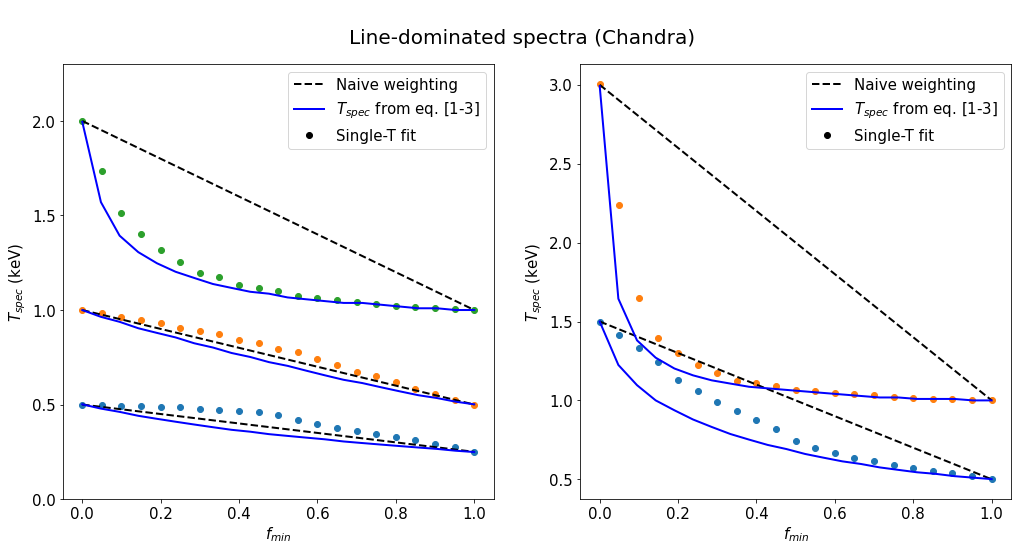

In [9]:
plt.figure(figsize=(17,8))
 
data__name = "data/stats_12.dat"

data = get_data(data__name, show_table=False)

plt.suptitle('\n' + 'Line-dominated spectra (' + telescope + ')', fontsize = 20)

plt.subplot(1,2,1)

T_mins = (0.25, 0.5, 1.)
T_maxs = (0.5, 1.0, 2.0)

for T_min, T_max in list(zip(T_mins, T_maxs)):
    
    # mean energy
    plot_Tspec_fmin(T_min, T_max, 21, data, naive=True, lstyle='-', cline='blue')
    plot_Tspec_fmin_details()
    
    # direct fit
    Tspec_list = Tspec_lines_all[str(T_min)+'-'+str(T_max)]
    plt.scatter(np.linspace(0, 1, len(Tspec_list)), Tspec_list)
    
    #plt.plot(np.linspace(0, 1, len(Tspec_list)), Tspec_list, color='black', linewidth=1)
    
plt.ylim(0, 2.3)

    
plt.subplot(1,2,2)

T_mins = (0.5, 1.0)
T_maxs = (1.5, 3.0)

for T_min, T_max in list(zip(T_mins, T_maxs)):
    
    # mean energy
    plot_Tspec_fmin(T_min, T_max, 21, data, naive=True, lstyle='-', cline='blue')
    plot_Tspec_fmin_details()
    
    #plot_Tspec_fmin(T_min, T_max, 20, get_data("data/stats_10.dat", show_table=False), naive=False, lstyle='-', cline='red')
    
    # direct fit
    Tspec_list = Tspec_lines_all[str(T_min)+'-'+str(T_max)]
    plt.scatter(np.linspace(0, 1, len(Tspec_list)), Tspec_list)
    
#plt.savefig('Fig3_'+telescope+'_'+data__name[11:13]+'.png')
plt.show()

# CONTINUUM ONLY

To show list of `xspec` commands use `x.Plot.commands`.
If something is not plotting, try `x.Plot.commands=()`.

In [7]:
def get_Tspec_continuum_eq45(fminnn, Tmin, Tmax):
    
    # derive T_spec from given values 
    # of T_min, T_max and f_min
    
    Tspec = []
    
    for fmin in fminnn:
        
        temperatures = [Tmin, Tmax]
        weights = temperatures*0

        alpha = 0.75
        
        weights = [temperatures[i]**(-alpha) for i in range(0, len(temperatures))]

        weights = np.multiply(weights, [fmin, (1-fmin)])

        #print(weights)

        num = np.dot(weights, temperatures)
        denom = sum(weights)

        #print(num/denom)
        
        Tspec.append(num/denom)

    return Tspec

#bbb = get_Tspec_continuum_eq45([0.2, 0.3], 1.0, 2.0)
#print(bbb)

# calculating photon count rate for continuum

def c_T(T, T_left, T_right, telescope_name, Xplot=False):
    
    x.AllData.removeDummyrsp()
    x.AllData.dummyrsp(lowE=0.1, highE=50.0, nBins=1024)
    x.Xset.addModelString("APEC_TRACE_ABUND", "0")
    
    if telescope_name == 'Chandra':
        RMF_NAME = 'telescopes/chandra/djs50.ugc3957_v05.rmf' 
        ARF_NAME = 'telescopes/chandra/djs50.ugc3957_v05.arf' 
    elif telescope_name == 'SRG/eROSITA':
        RMF_NAME = 'telescopes/erosita/erosita_pirmf_v20210719.rmf'
        ARF_NAME = 'telescopes/erosita/tm1_arf_open_000101v02.fits'

    # set model for fakeit
    
    mod = x.Model('phabs*apec')
    mod.setPars(0.01, T, 0.0, 0, 1)
    x.AllModels.show()
    
    if Xplot:
        x.Plot.device = '/xs'
    else:
        x.Plot.device = '/null'

    # fake spectrum
    fs = x.FakeitSettings(response = RMF_NAME, 
                               arf = ARF_NAME, 
                        background = '', 
                          exposure = '40000', 
                        correction = '', 
                      backExposure = '', 
                          fileName = 'fakeit.pha')
    x.AllData.fakeit(nSpectra = 1, 
                     settings = fs, 
                   applyStats = True,
                   filePrefix = "",
                      noWrite = True)

    x.AllData.ignore(f"**-{T_left} {T_right}-**")             # IMPORTANT !
    
    x.Plot.xAxis = "keV"
    #x.AllData.show()
    x.Plot("ldata")
    #xVals = x.Plot.x()
    #yVals = x.Plot.y()
    
    s1 = x.AllData(1).rate[0]
    
    #print(s1)
    
    #plt.plot(xVals, yVals, label=str(T))
    #plt.xscale('log')
    #plt.legend()
    #plt.grid()
    #plt.show()

    return s1 # np.dot(xVals, yVals)    
    
#for i in range(0, 100):
#    ddd = c_T(0.01+i/10, 0.7, 10.0, 'Chandra', True)
#    print(ddd)

def get_Tspec_continuum_eq46(fminnn, Tmin, Tmax, alpha, telescope_name):
    
    # derive T_spec from given values 
    # of T_min, T_max and f_min
    
    Tspec = []
    
    for fmin in fminnn:
        
        temperatures = [Tmin, Tmax]
        weights = temperatures*0

        #alpha = 0.875
        
        weights = [temperatures[i]**(-alpha) for i in range(0, len(temperatures))]

        weights = np.multiply(weights, [fmin, (1-fmin)])
        
        c_T_min = c_T(Tmin, 0.7, 10.0, telescope_name, Xplot=False)
        c_T_max = c_T(Tmax, 0.7, 10.0, telescope_name, Xplot=False)
        
        weights = np.multiply(weights, [c_T_min, c_T_max])

        #print(weights)

        num = np.dot(weights, temperatures)
        denom = sum(weights)

        #print(num/denom)
        
        Tspec.append(num/denom)

    return Tspec

#bbb = get_Tspec_continuum_eq46(np.linspace(0, 1, 21), 1.0, 2.0, 0.875, 'Chandra')
#print(bbb)

### Mazotta-like fit
Single-T fit for mixture of 2 continuums (now working properly):

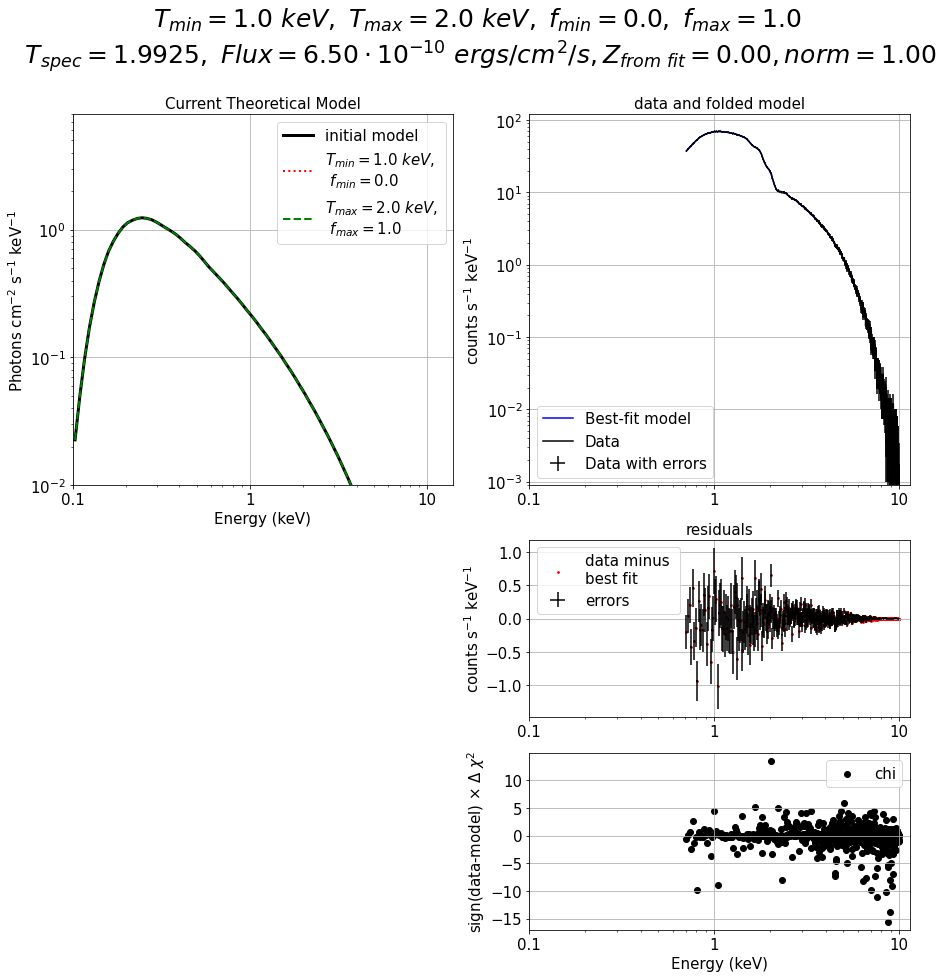

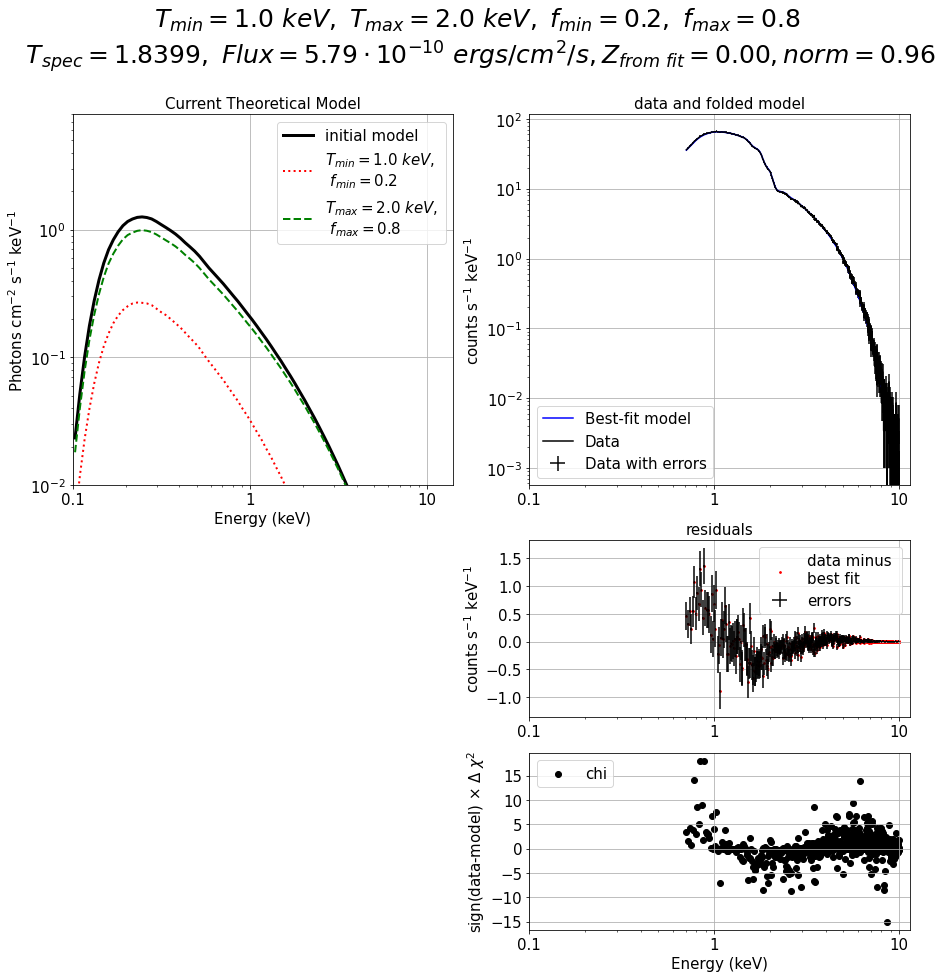

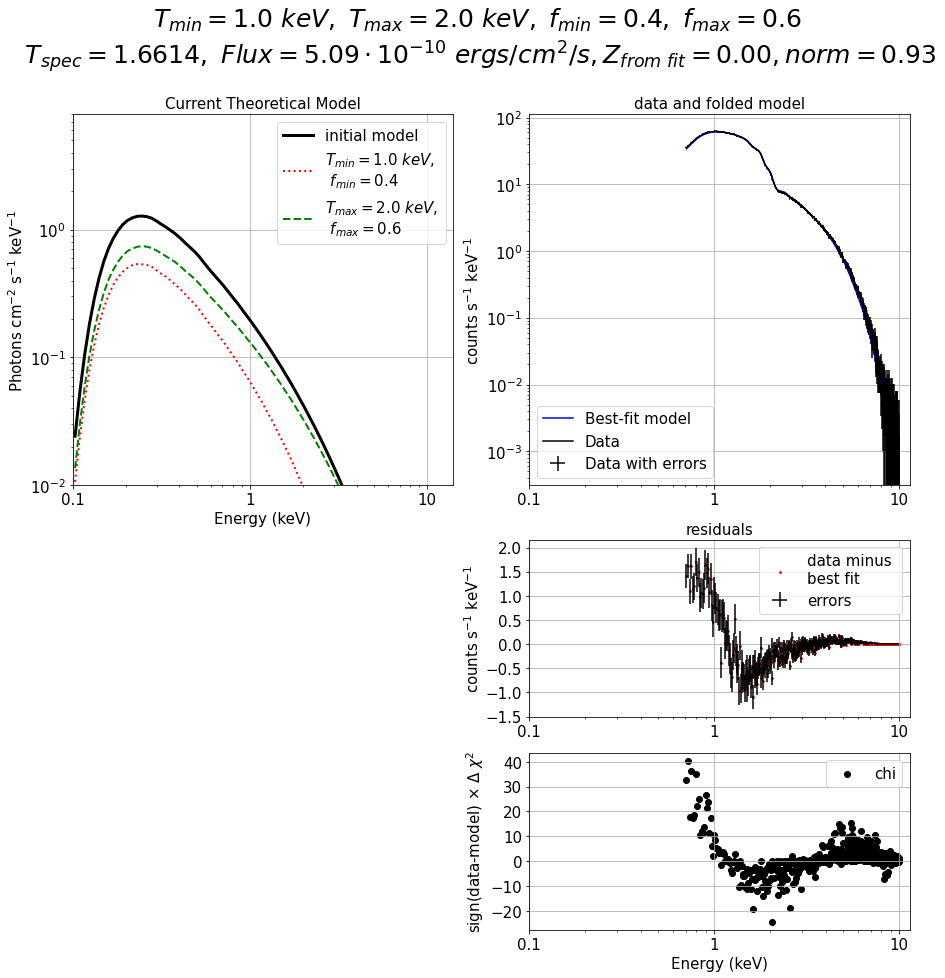

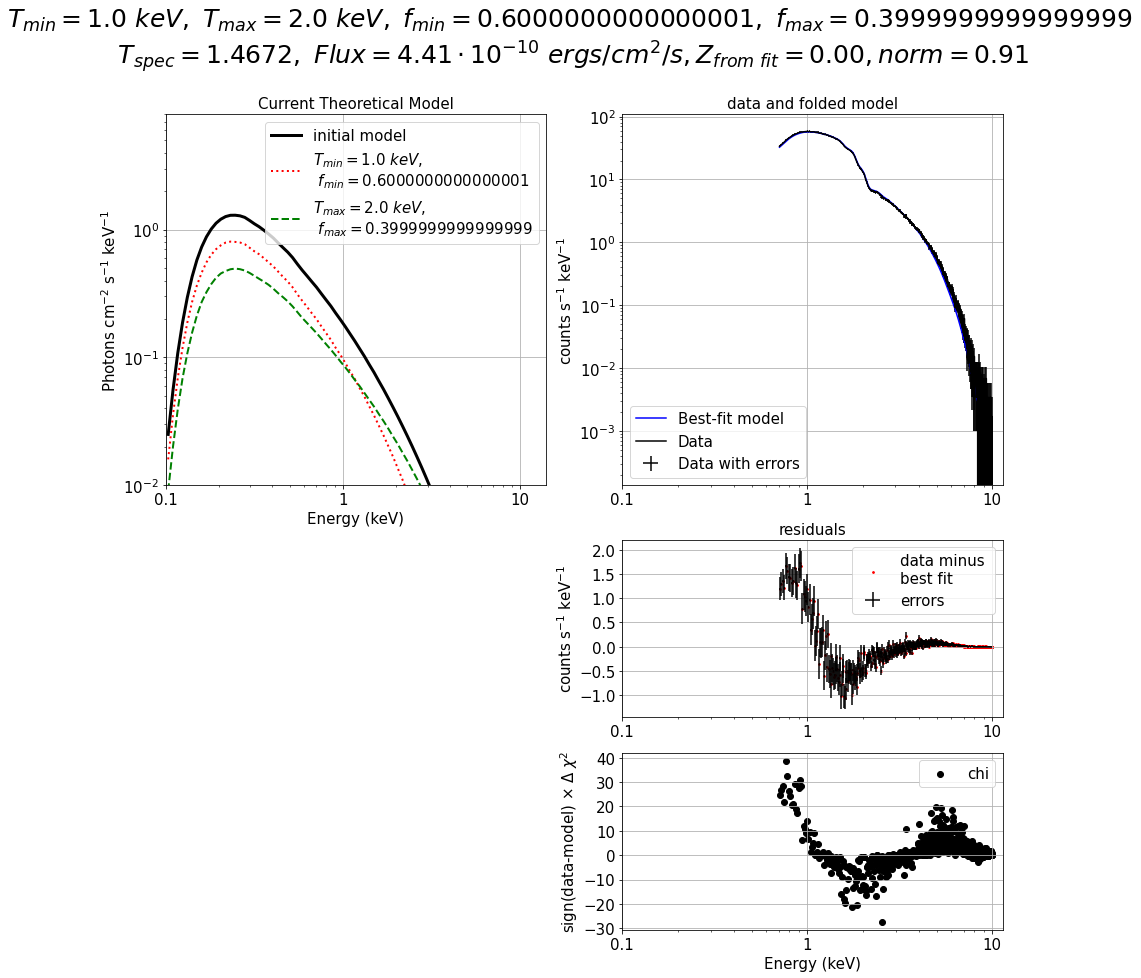

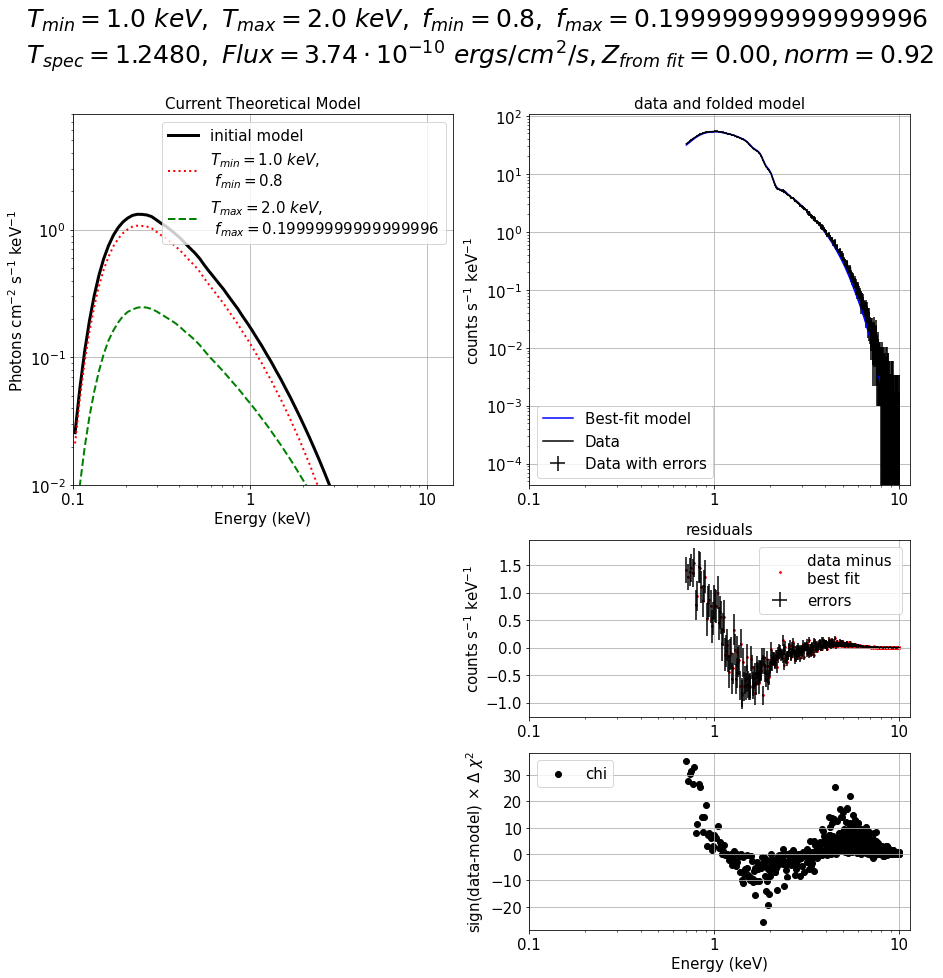

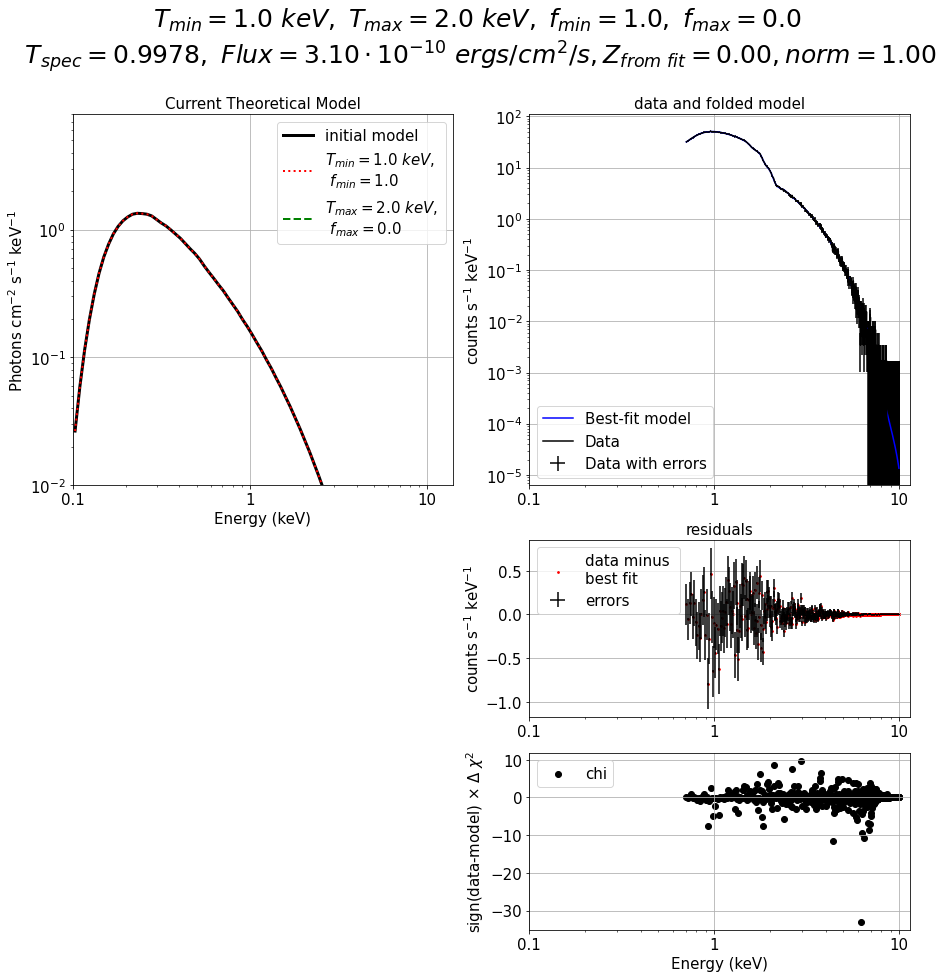

[1.9925245950658566, 1.839939709241703, 1.6614385262288813, 1.467185321334116, 1.247972126613305, 0.9977625605885154]
[6.498663501109869e-10, 5.794481050514766e-10, 5.091692844688161e-10, 4.405753828959796e-10, 3.7371368277019447e-10, 3.1037508841789813e-10]


In [32]:
def single_T_fit_continuum(T_minnn, T_maxxx, N_fmins, telescope_name, T_left_cutoff, plot=False, Xplot=False):

    x.AllData.removeDummyrsp()
    x.AllData.dummyrsp(lowE=0.1, highE=50.0, nBins=100)
    x.Xset.addModelString("APEC_TRACE_ABUND", "0")
    
    if telescope_name == 'Chandra':
        RMF_NAME = 'telescopes/chandra/djs50.ugc3957_v05.rmf' 
        ARF_NAME = 'telescopes/chandra/djs50.ugc3957_v05.arf' 
    elif telescope_name == 'SRG/eROSITA':
        RMF_NAME = 'telescopes/erosita/erosita_pirmf_v20210719.rmf'
        ARF_NAME = 'telescopes/erosita/tm1_arf_open_000101v02.fits'
    
    if Xplot:
        x.Plot.device = "/xs"
    else:
        x.Plot.device = '/null'

    tspec_list = []
    flux_list = []
    abund_list = []

    for l in range(0, N_fmins):

        f_minnn = 0.0 + 1/(N_fmins-1)*(l)
        f_maxxx = 1-f_minnn
        
        #print(l, f_minnn)
        
        # set model for fakeit
        mod = x.Model('phabs*(const*apec+const*apec)')
        mod.setPars(0.01, f_minnn, T_minnn, 0.0, 0, 1, f_maxxx, T_maxxx, 0.0, 0, 1)
        x.AllModels.show()
        
        #x.AllModels.calcFlux('0.7 10.0')
        #print("contn: ", mod.flux)
        #fluxx = mod.flux[0]
        #flux_list.append(fluxx)
        
        if plot:
            
            plt.figure(figsize=(15, 15))
            
            plt.subplot(2,2,1)
            x.Plot("model")
            x.Plot.add = True
            #x.Plot.setID()
            xVals = x.Plot.x()
            modVals = x.Plot.model()
            yAdd1 = x.Plot.addComp(1)
            yAdd2 = x.Plot.addComp(2)
            #yAdd3 = x.Plot.addComp(3)
            #yAdd4 = x.Plot.addComp(4)
            #yAdd12 = [a+b for a,b in zip(yAdd1, yAdd2)]
            #yAdd34 = [c+d for c,d in zip(yAdd3, yAdd4)]
            plt.plot(xVals, modVals, linewidth = 3, label='initial model', color='black')
            plt.plot(xVals, yAdd1, linewidth = 2, linestyle = ":", 
                     label=f'$T_{{min}}={T_minnn} \ keV$, \n $f_{{min}}={f_minnn}$', color='red')
            plt.plot(xVals, yAdd2, linewidth = 2, linestyle = "--", 
                     label=f'$T_{{max}}={T_maxxx} \ keV$, \n $f_{{max}}={f_maxxx}$', color='green')
            #plt.plot(xVals, [c+d for c,d in zip(yAdd12, yAdd34)], label='sum')
            #plt.plot(xVals, yAdd3, label='3')
            #plt.plot(xVals, yAdd4, label='4')
            plt.xscale('log')
            plt.yscale('log')
            plt.xlim(0.1, 14)
            plt.ylim(0.01, 8)
            plt.legend(fontsize = 15, loc=1)
            add_plt_fancy()
            #plt.show()
            
        # fake spectrum
        fs = x.FakeitSettings(response = RMF_NAME, 
                                   arf = ARF_NAME, 
                            background = '', 
                              exposure = '40000', 
                            correction = '', 
                          backExposure = '', 
                              fileName = 'fakeit.pha')
        x.AllData.fakeit(nSpectra = 1, 
                         settings = fs, 
                       applyStats = True,
                       filePrefix = "",
                          noWrite = True)
        
        x.AllData.ignore(f"**-{T_left_cutoff} 10.-**")     # IMPORTANT !
        #x.Plot.xAxis = "keV"
        #x.Plot("data")
        x.AllData.show()
        #x.Plot("model data resid")
        #x.Plot("data")
        #x.Plot.add = True
        #x.Plot.background = False
        #bkg = x.Plot.backgroundVals()
        
        # fitting
        mod2fit = x.Model("phabs*apec")
        mod2fit.setPars(0.01, 1.0, 0.0, 0., 1)
        mod2fit(1).frozen = True #n_H
        #mod2fit(3).frozen = False #abundance 
        #mod2fit(5).frozen = True # norm
        #mod2fit(5).values = "1, -1, 0.0, 0.0, 1.1, 1.1"
        
        #x.AllData.ignore("bad")
        #x.Fit.renorm('auto')
        x.Fit.nIterations = 100
        #x.Fit.statMethod = 'chi'
        #x.Fit.weight = 'standard'
        #x.Fit.statMethod = "cstat"
        x.Fit.query = 'yes'
        x.Fit.perform()
        #x.AllModels.show()
        x.Fit.show()
        
        best_kT = mod2fit(2).values[0]
        #print(best_kT)
        tspec_list.append(best_kT)
        
        abund_from_fit = mod2fit(3).values[0]
        norm = mod2fit(5).values[0]
        abund_list.append(abund_from_fit)
        
        #fluxx = x.AllData(1).rate[0]
        #flux_list.append(fluxx) # in units of counts / s
        
        x.AllModels.calcFlux('0.7 10.0')
        fluxx = x.AllData(1).flux[0]
        #print(x.AllData(1).flux)
        flux_list.append(fluxx) # in units of ergs/cm2/s
        
        if plot:
            
            plt.suptitle(f'$T_{{min}}={T_minnn} \ keV, \ T_{{max}}={T_maxxx} \ keV, \ f_{{min}}={f_minnn}, \ f_{{max}}={f_maxxx}$ \n $T_{{spec}}={best_kT:.4f}, \ Flux = {fluxx*10**10:.2f}\cdot 10^{{-10}} \ ergs/cm^2/s, Z_{{from \ fit}} = {abund_from_fit:.2f}, norm = {norm:.2f} $ \n', fontsize = 25)
            
            plt.subplot(2,2,2)
            x.Plot("data")
            x.Plot.xAxis = "keV"
            x.Plot.add = True
            xVals = x.Plot.x()
            yVals = x.Plot.y()
            modVals = x.Plot.model()
            plt.yscale('log')
            #y1 = x.Plot.addComp(1)
            #y2 = x.Plot.addComp(2)
            #plt.plot(xVals, y1, label="APEC: Z=1")
            #plt.plot(xVals, [-aa for aa in y2], label="APEC: Z=0")
            #summa = [c+d for c,d in zip(y1, y2)]
            plt.plot(xVals, modVals, label='Best-fit model', color='blue')
            plt.plot(xVals, yVals, label='Data', color='black')
            xErrs = x.Plot.xErr()
            yErrs = x.Plot.yErr()
            plt.errorbar(xVals, yVals, yErrs, xErrs, 
                         fmt = "none", ecolor = "black", label="Data with errors")
            add_plt_fancy_cont()
            plt.xlabel("")
            
            plt.subplot(4,2,6)
            x.Plot("resid")
            #plt.subplot(2,2,4)
            xValsR = x.Plot.x()
            yValsR = x.Plot.y()
            xErrsR = x.Plot.xErr()
            yErrsR = x.Plot.yErr()
            plt.errorbar(xValsR, yValsR, yErrsR, xErrsR, 
                         fmt = "none", ecolor = "black", label="errors")
            plt.scatter(xValsR, [a-b for a,b in zip(yVals, modVals)], s=3, 
                        color='red', label='data minus \nbest fit')
            add_plt_fancy_cont()
            plt.xlabel("")
            
            plt.subplot(4,2,8)
            x.Plot("chi")
            #plt.subplot(2,2,4)
            xValsC = x.Plot.x()
            yValsC = x.Plot.y()
            #xErrsR = x.Plot.xErr()
            #yErrsR = x.Plot.yErr()
            plt.scatter(xValsC, yValsC, color = "black", label="chi")
            add_plt_fancy()
            plt.title("")
            
            #finally
            plt.show()     
            
        x.Plot("model data resid")
        #x.Plot.commands=()
        x.AllData.clear()

    return tspec_list, flux_list
        
def add_plt_fancy_cont():
    plt.xlabel(x.Plot.labels()[0], fontsize = 15)
    plt.ylabel(x.Plot.labels()[1], fontsize = 15)
    plt.title(x.Plot.labels()[2], fontsize = 15)
    plt.xticks(size=15)
    plt.yticks(size=15)
    plt.grid()
    plt.xscale('log')
    plt.xticks([0.1, 1., 10.], [0.1, 1, 10])
    plt.legend(fontsize=15, loc=0)
    
ccc, fluxccc = single_T_fit_continuum(1.0, 2.0, 6, 'Chandra', 0.7, plot=True, Xplot=False)
print(ccc)
print(fluxccc)

## Figure 4

Вычисляем всё необходимое:

In [168]:
#telescope = 'Chandra' 
telescope = 'SRG/eROSITA'

if telescope == 'Chandra':
    alpha_current = 0.875
else:
    alpha_current = 0.73
    
print(alpha_current)

f_min = np.linspace(0, 1, 11)
T_spec = f_min*0

T_mins = (0.25, 0.5, 1.0, 2.0, 4.0)
T_maxs = (1.0,  2.0, 4.0, 8.0, 16.0)

Tspec_from_eq46 ={}
Tspec_from_fit ={}

for T_min, T_max in list(zip(T_mins, T_maxs)):
    
    # Tspec from equations 4, 6
    tspec_list = get_Tspec_continuum_eq46(f_min, T_min, T_max, alpha_current, telescope)
    Tspec_from_eq46[str(T_min)+'-'+str(T_max)] = tspec_list
    
    # Tspec from direct fit
    tspec_list_1 = single_T_fit_continuum(T_min, T_max, len(f_min), telescope, 0.7, plot=False, Xplot=False)[0]
    Tspec_from_fit[str(T_min)+'-'+str(T_max)] = tspec_list_1
    
    print(str(T_min)+'-'+str(T_max)+": done")

0.73
0.25-1.0: done
0.5-2.0: done
1.0-4.0: done
2.0-8.0: done
4.0-16.0: done


In [169]:
for key in Tspec_from_eq46.keys():
    print(key, 'keV')
    print('Eqs. 4, 6:', [f'{vl:.2f}' for vl in Tspec_from_eq46[key]], '\n')
    print('Direct fit', [f'{vl:.2f}' for vl in Tspec_from_fit[key]], '\n')

0.25-1.0 keV
Eqs. 4, 6: ['1.00', '0.98', '0.96', '0.93', '0.89', '0.85', '0.79', '0.72', '0.62', '0.48', '0.25'] 

Direct fit ['1.00', '0.91', '0.83', '0.75', '0.67', '0.59', '0.52', '0.45', '0.38', '0.32', '0.25'] 

0.5-2.0 keV
Eqs. 4, 6: ['2.00', '1.88', '1.75', '1.62', '1.48', '1.34', '1.19', '1.03', '0.86', '0.68', '0.50'] 

Direct fit ['1.99', '1.75', '1.52', '1.33', '1.16', '1.01', '0.89', '0.78', '0.68', '0.59', '0.50'] 

1.0-4.0 keV
Eqs. 4, 6: ['4.00', '3.57', '3.17', '2.81', '2.49', '2.19', '1.91', '1.66', '1.42', '1.20', '1.00'] 

Direct fit ['3.97', '3.38', '2.84', '2.40', '2.07', '1.78', '1.57', '1.40', '1.25', '1.12', '1.00'] 

2.0-8.0 keV
Eqs. 4, 6: ['8.00', '6.79', '5.82', '5.04', '4.38', '3.83', '3.36', '2.95', '2.59', '2.28', '2.00'] 

Direct fit ['7.93', '7.05', '5.89', '4.67', '3.81', '3.32', '2.94', '2.63', '2.38', '2.18', '1.99'] 

4.0-16.0 keV
Eqs. 4, 6: ['16.00', '13.04', '10.92', '9.31', '8.05', '7.05', '6.22', '5.53', '4.94', '4.44', '4.00'] 

Direct fit ['16.0

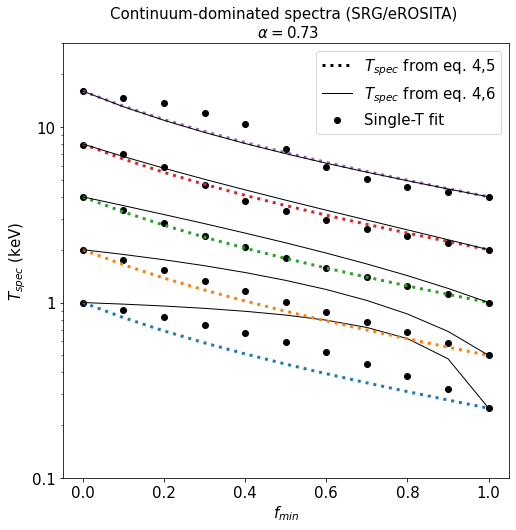

In [170]:
plt.figure(figsize=(8,8))

#telescope = 'Chandra' 
#telescope = 'SRG/eROSITA'

T_mins = (0.25, 0.5, 1.0, 2.0, 4.0)
T_maxs = (1.0,  2.0, 4.0, 8.0, 16.0)

for T_min, T_max in list(zip(T_mins, T_maxs)):
    
    # naive weighting
    #plt.plot(f_min, f_min*T_min+(1-f_min)*T_max, linestyle = '--', linewidth=2, color='black')
    
    # Tspec from equations 4, 5
    plt.plot(f_min, get_Tspec_continuum_eq45(f_min, T_min, T_max), linestyle = ':', linewidth = 3)

    # Tspec from equations 4, 6
    Tspec_list = Tspec_from_eq46[str(T_min)+'-'+str(T_max)]
    plt.plot(np.linspace(0, 1, len(Tspec_list)), Tspec_list, color='black', linewidth=1)
    #plt.scatter(np.linspace(0, 1, len(Tspec_list)), Tspec_list, color='black')
    
    # Tspec from direct fit
    Tspec_list1 = Tspec_from_fit[str(T_min)+'-'+str(T_max)]
    plt.scatter(np.linspace(0, 1, len(Tspec_list1)), Tspec_list1, color='black')
    
#plt.scatter(np.linspace(0, 1, len(T_spec)), T_spec, color='blue')   
    
plt.ylim(0.1, 30)
plt.yscale('log')
plt.xticks(size=15)
plt.yticks([0.1, 1, 10], [0.1, 1, 10], size=15)
plt.xlabel('$f_{min}$', fontsize = 15)
plt.ylabel('$T_{spec}$ (keV)', fontsize = 15)
plt.title('Continuum-dominated spectra ('+telescope+') \n $\\alpha=$'+str(alpha_current), fontsize = 15)

handles, labels = plt.gca().get_legend_handles_labels()
#line_n = Line2D([], [], label='Naive weighting', color='black', linestyle='--', linewidth=2)
line_e = Line2D([], [], label='$T_{spec}$ from eq. 4,5', color='black', linestyle=':', linewidth=3)
dots_f = Line2D([], [], label='$T_{spec}$ from eq. 4,6', color='black', linestyle='-', linewidth=1)
dots_T = Line2D([], [], label='Single-T fit', color='black', marker='.', linewidth=0, markersize=12)
handles.extend([line_e, dots_f, dots_T])
plt.legend(handles=handles, fontsize=15)

#plt.savefig('Fig4_'+str(telescope)+'.png')
plt.show()

Let's try to find the value of $\alpha$ at which $T_{sl}$ from equations 4,6 is the closest to $T_{spec}$ from direct fit. Observations by SRG/eROSITA and also by Chandra are considered. See eq. (13) from Mazzotta et al. (2004): https://arxiv.org/pdf/astro-ph/0404425.pdf

$\Delta=\frac{1}{N} \sum_{T_1, T_2} \sqrt{\left(\frac{T_{\mathrm{sl}} - T_{\mathrm{spec}}}{T_{\mathrm{spec}}}\right)^2}$

In [78]:
telescope = 'Chandra' 
#telescope = 'SRG/eROSITA'

deltas = []
#alphas = np.linspace(0.350, 0.950, 3)  #Chandra
alphas = np.linspace(0.650, 0.850, 5)  #eROSITA

#[0.875, 0.900, 0.925, 0.950, 0.975, 1.000]
#[0.750, 0.775, 0.800, 0.825, 0.850, 0.875, 0.900]

f_min = np.linspace(0, 1, 21)

for a in alphas:

    delta_sum = 0
    N_deltasum = 0

    T_mins = (0.25, 0.5, 1.0, 2.0, 4.0)
    T_maxs = (1.0,  2.0, 4.0, 8.0, 16.0)

    #T_min = 0.5
    #T_max = 2.0

    for T_min, T_max in list(zip(T_mins, T_maxs)):

        # Tspec from equations 4, 6
        T_sl = get_Tspec_continuum_eq46(f_min, T_min, T_max, a, telescope)
        #print(T_sl)

        # Tspec from direct fit
        #T_spec = single_T_fit_continuum(T_min, T_max, len(f_min), telescope, 0.7, plot=False, Xplot=False)[0]
        T_spec = Tspec_from_fit[str(T_min)+'-'+str(T_max)]
        #print(T_spec)

        #print(T_spec)
        difference = [Ta-Tb for Ta, Tb in zip(T_sl, T_spec)]
        #print(difference)
        terms = [num/denom for num, denom in zip(difference, T_spec)]
        #print(term)
        terms2 = [t**2 for t in terms]
        #print(terms2)
        sqrterms2 = [np.sqrt(tt) for tt in terms2]
        
        delta_term = np.sum(sqrterms2)

        delta_sum = delta_sum + delta_term
        
        N_deltasum = N_deltasum + len(f_min)
        
        print(N_deltasum, end=" ")
        
    Delta = delta_sum/N_deltasum
    
    print(a, Delta)

    deltas.append(Delta)
    
#print(deltas)

21 42 63 84 105 0.65 0.02067995957254531
21 42 63 84 105 0.7 0.024861328272167256
21 42 63 84 105 0.75 0.03211573321286605
21 42 63 84 105 0.8 0.04085761708662324
21 42 63 84 105 0.85 0.05356651841578203


In [79]:
if telescope == 'Chandra': 
    alphas_CH = alphas
    deltas_CH = deltas
else:
    alphas_ER = alphas
    deltas_ER = deltas

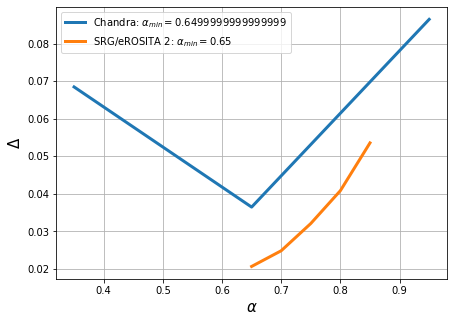

In [80]:
plt.figure(figsize=(7,5))
plt.plot(alphas_CH, deltas_CH, linewidth=3, label='Chandra: $\\alpha_{min} =$'+str(alphas_CH[np.argmin(deltas_CH)]))
#plt.plot(list1, list2, linewidth=3, label='SRG/eROSITA 1: $\\alpha_{min} =$'+str(list1[np.argmin(list2)]))
plt.plot(alphas_ER, deltas_ER, linewidth=3, label='SRG/eROSITA 2: $\\alpha_{min} =$'+str(alphas_ER[np.argmin(deltas_ER)]))
plt.xlabel('$\\alpha$', fontsize=15)
plt.ylabel('$\\Delta$', fontsize=15)#, rotation = 'horizontal')
plt.legend()
plt.grid()
#plt.savefig('delta_alpha_ER.png')
plt.show()

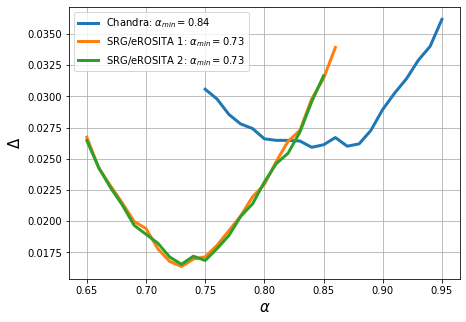

In [67]:
plt.figure(figsize=(7,5))
plt.plot(alphas_CH, deltas_CH, linewidth=3, label='Chandra: $\\alpha_{min} =$'+str(alphas_CH[np.argmin(deltas_CH)]))
plt.plot(list1, list2, linewidth=3, label='SRG/eROSITA 1: $\\alpha_{min} =$'+str(list1[np.argmin(list2)]))
plt.plot(alphas_ER, deltas_ER, linewidth=3, label='SRG/eROSITA 2: $\\alpha_{min} =$'+str(alphas_ER[np.argmin(deltas_ER)]))
plt.xlabel('$\\alpha$', fontsize=15)
plt.ylabel('$\\Delta$', fontsize=15)#, rotation = 'horizontal')
plt.legend()
plt.grid()
#plt.savefig('delta_alpha_ER.png')
plt.show()

We can see that $\Delta$ reaches its minimum at $\alpha=0.73$ (for SRG/eROSITA observations). 

# REALISTIC METALLICITIES

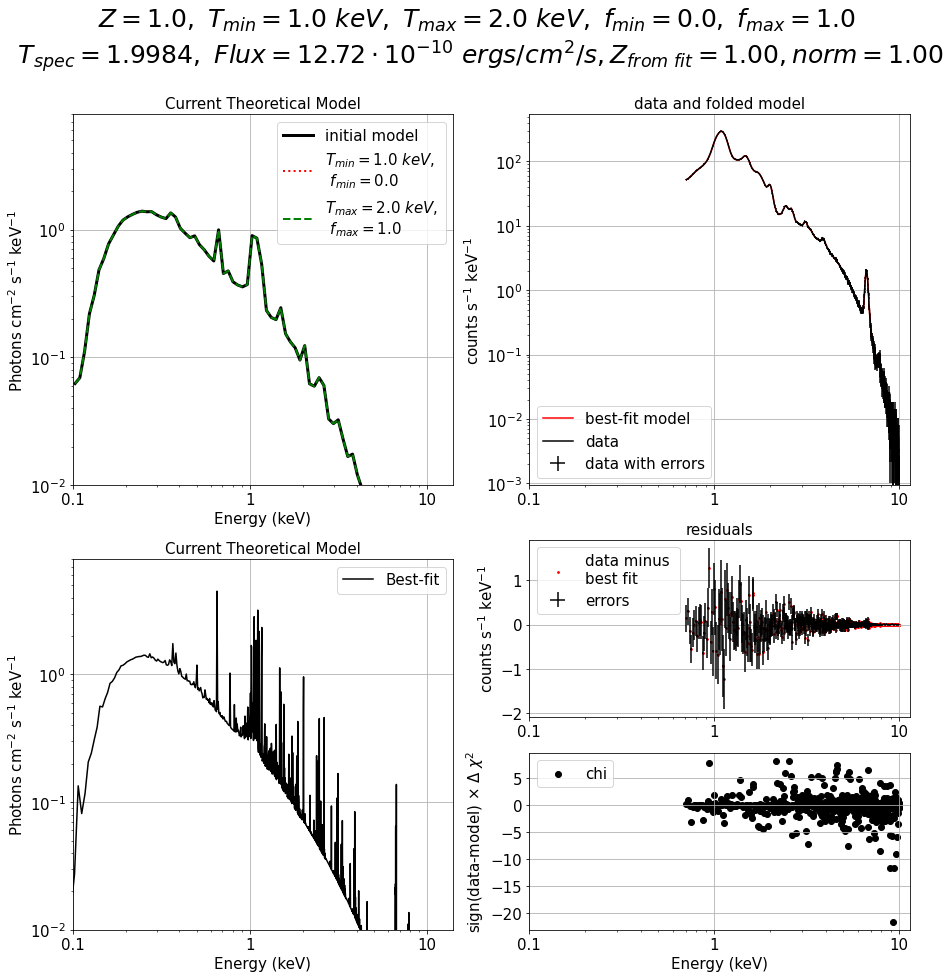

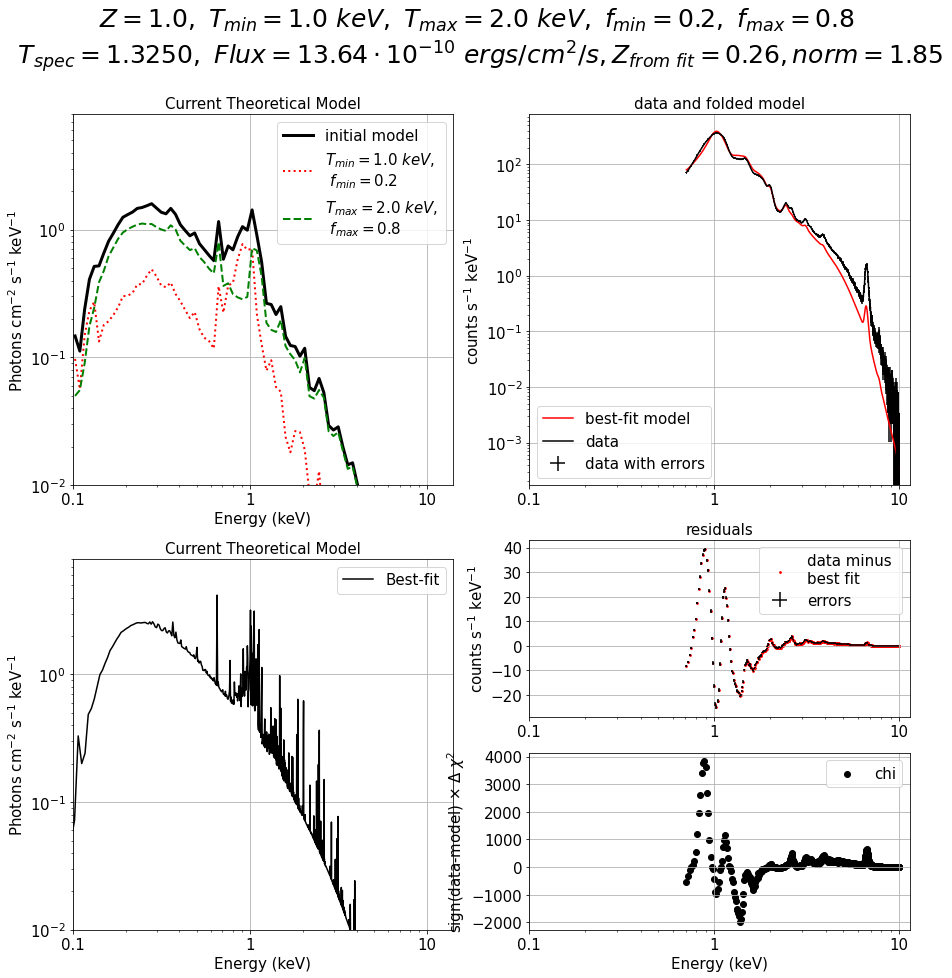

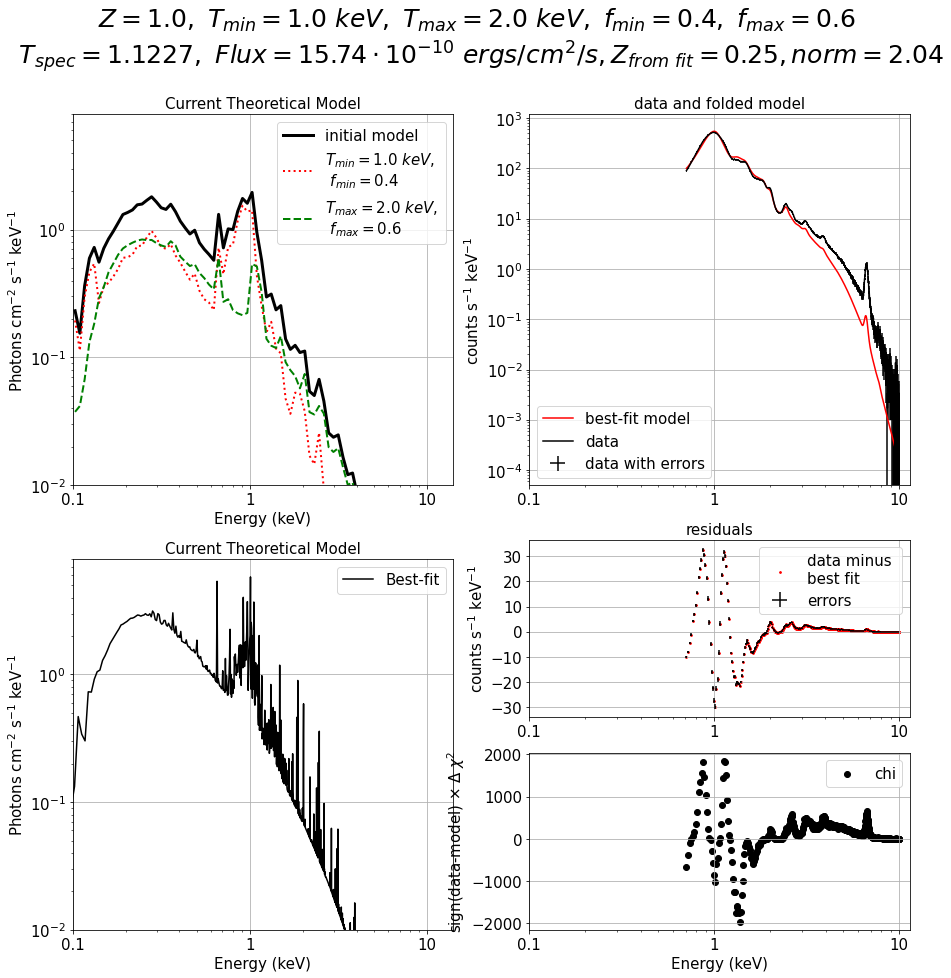

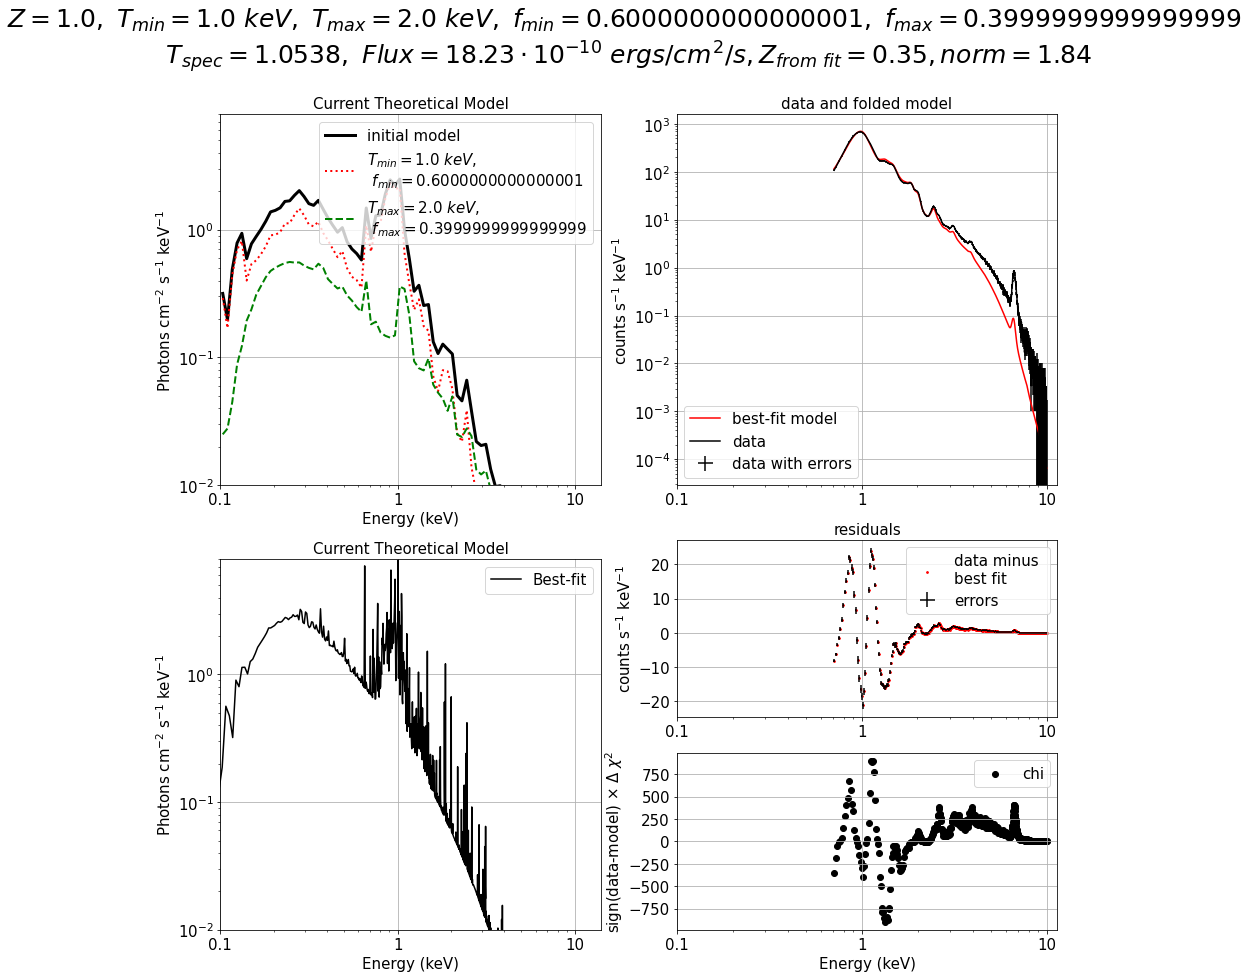

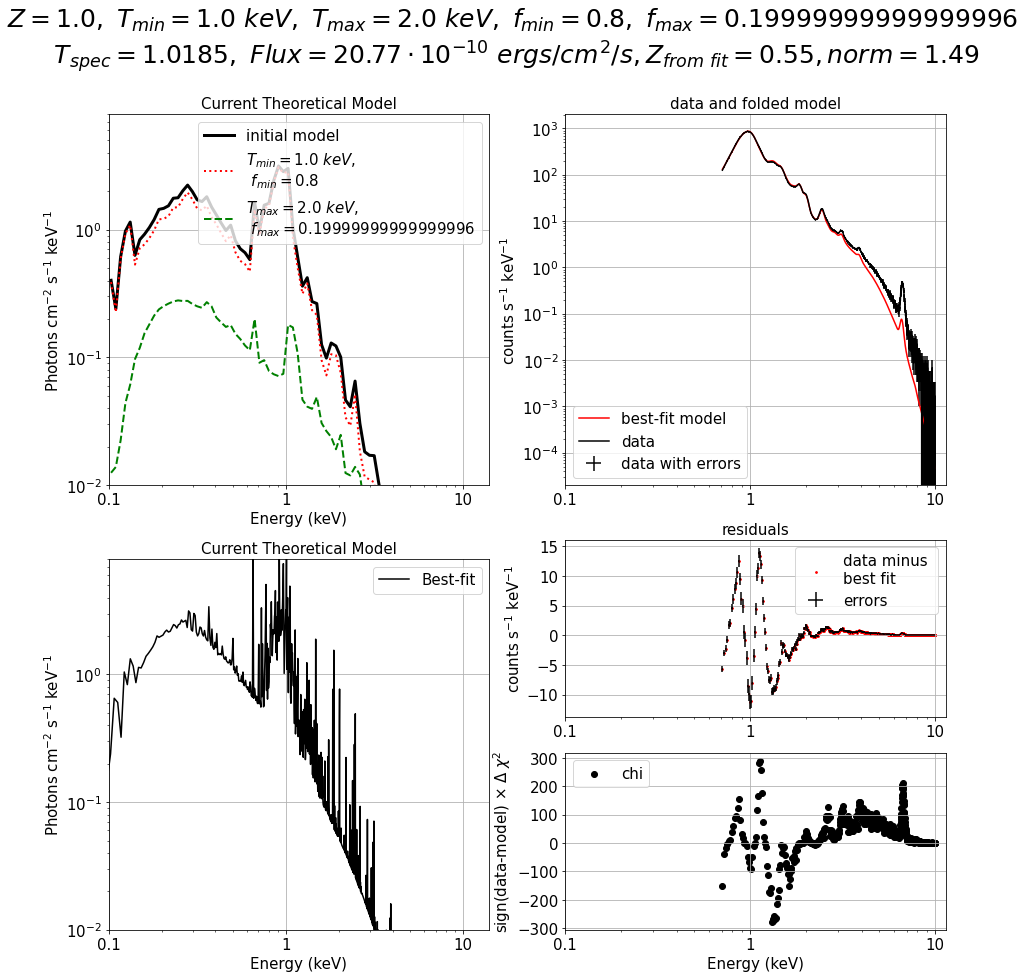

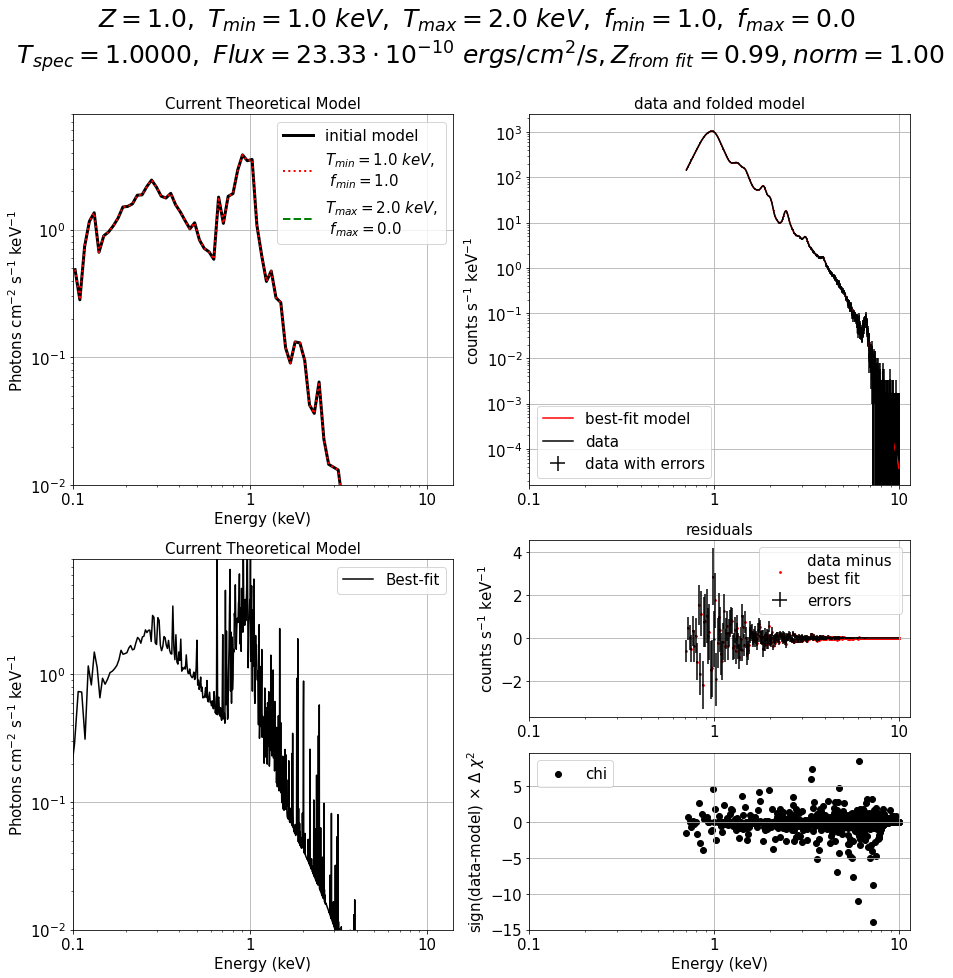

[1.9984290058294023, 1.3250437099565913, 1.1226605107993155, 1.053806699428673, 1.0184617136858578, 0.9999606892598076]
[1.272356145681905e-09, 1.3644496639042217e-09, 1.5743765236206538e-09, 1.8226027172014542e-09, 2.077271477838145e-09, 2.332862969371574e-09]


In [45]:
def single_T_realistic(T_minnn, T_maxxx, N_fmins, abund, telescope_name, plot=False, Xplot=False):

    x.AllData.removeDummyrsp()
    x.AllData.dummyrsp(lowE=0.1, highE=50.0, nBins=100)
    x.Xset.addModelString("APEC_TRACE_ABUND", "0")
    
    if telescope_name == 'Chandra':
        RMF_NAME = 'telescopes/chandra/djs50.ugc3957_v05.rmf' 
        ARF_NAME = 'telescopes/chandra/djs50.ugc3957_v05.arf' 
    elif telescope_name == 'SRG/eROSITA':
        RMF_NAME = 'telescopes/erosita/erosita_pirmf_v20210719.rmf'
        ARF_NAME = 'telescopes/erosita/tm1_arf_open_000101v02.fits'
    
    if Xplot:
        x.Plot.device = "/xs"
    else:
        x.Plot.device = '/null'

    tspec_list = []
    flux_list=[]

    for l in range(0, N_fmins):

        f_minnn = 0.0+1/(N_fmins-1)*(l)
        f_maxxx = 1-f_minnn
        
        # set model for fakeit
        mod = x.Model('phabs*(const*apec+const*apec)')
        mod.setPars(0.01, f_minnn, T_minnn, abund, 0, 1, f_maxxx, T_maxxx, abund, 0, 1)
        x.AllModels.show()
        #x.Plot.show()
        
        #x.AllModels.calcFlux('0.7 10.0')
        #print("reals: ", mod.flux)
        #fluxx = mod.flux[0]
        #flux_list.append(fluxx)
        
        if plot:
            
            plt.figure(figsize=(15, 15))
            
            plt.subplot(2,2,1)
            x.Plot("model")
            x.Plot.add = True
            #x.Plot.setID()
            xVals = x.Plot.x()
            modVals = x.Plot.model()
            yAdd1 = x.Plot.addComp(1)
            yAdd2 = x.Plot.addComp(2)
            plt.plot(xVals, modVals, linewidth = 3, label='initial model', color='black')
            plt.plot(xVals, yAdd1, linewidth = 2, linestyle = ":", 
                     label=f'$T_{{min}}={T_minnn} \ keV$, \n $f_{{min}}={f_minnn}$', color='red')
            plt.plot(xVals, yAdd2, linewidth = 2, linestyle = "--", 
                     label=f'$T_{{max}}={T_maxxx} \ keV$, \n $f_{{max}}={f_maxxx}$', color='green')
            plt.xscale('log')
            plt.yscale('log')
            plt.xlim(0.1, 14)
            plt.ylim(0.01, 8)
            plt.legend(fontsize = 15, loc=1)
            add_plt_fancy_real()
            #plt.show()
        
        # fake spectrum
        fs = x.FakeitSettings(response = RMF_NAME, 
                                   arf = ARF_NAME, 
                            background = '', 
                              exposure = '40000', 
                            correction = '', 
                          backExposure = '', 
                              fileName = 'fakeit.pha')
        x.AllData.fakeit(nSpectra = 1, 
                         settings = fs, 
                       applyStats = True,
                       filePrefix = "",
                          noWrite = True)
        
        x.AllData.ignore("**-0.7 10.-**")             # IMPORTANT !
        x.Plot("data")
        x.AllData.show()
        
        # fitting
        mod2fit = x.Model("phabs*apec")
        mod2fit.setPars(0.01, 1.0, abund, 0., 1)
        mod2fit(1).frozen = True    # n_H 
        mod2fit(3).frozen = False   # abundance
        #mod2fit(4).frozen = False   # redshift   
        #mod2fit(5).frozen = True   # norm
        #mod2fit(5).values = "1, -1, 0.0, 0.0, 1.1, 1.1"
        
        x.Fit.renorm('auto')
        x.Fit.nIterations = 100
        x.Fit.query = 'yes'
        x.Fit.weight = 'standard'
        x.Fit.statMethod = 'chi'
        x.Fit.perform()
        #x.Fit.goodness(10)
        
        best_kT = mod2fit(2).values[0]
        abund_from_fit = mod2fit(3).values[0]
        #print(best_kT)
        tspec_list.append(best_kT)
        
        norm = mod2fit(5).values[0]
        
        #fluxx = x.AllData(1).rate[0]
        #flux_list.append(fluxx) # in units of counts / s
        
        x.AllModels.calcFlux('0.7 10.0')
        fluxx = x.AllData(1).flux[0]
        #print(x.AllData(1).flux)
        flux_list.append(fluxx) # in units of ergs/cm2/s
        
        if plot:
            
            plt.suptitle(f'$Z ={abund}, \ T_{{min}}={T_minnn} \ keV, \ T_{{max}}={T_maxxx} \ keV, \ f_{{min}}={f_minnn}, \ f_{{max}}={f_maxxx}$ \n $T_{{spec}}={best_kT:.4f}, \ Flux = {fluxx*10**10:.2f}\cdot 10^{{-10}} \ ergs/cm^2/s, Z_{{from \ fit}} = {abund_from_fit:.2f}, norm = {norm:.2f}$ \n', fontsize = 25)
            
            plt.subplot(2,2,3)
            x.Plot("model")
            modVals = x.Plot.model()
            xVals = x.Plot.x()
            #yVals = x.Plot.addComp(1)
            #plt.plot(xVals, yVals, label="data")
            plt.plot(xVals, modVals, label="Best-fit", color='black')
            plt.xscale('log')
            plt.yscale('log')
            plt.xlim(0.1, 14)
            plt.ylim(0.01, 8)
            add_plt_fancy_real()
            #plt.title("Best-fit model")
            #plt.show()
        
        if plot:
            
            plt.subplot(2,2,2)
            x.Plot("data")
            x.Plot.xAxis = "keV"
            x.Plot.add = True
            xVals = x.Plot.x()
            yVals = x.Plot.y()
            modVals = x.Plot.model()
            plt.yscale('log')
            plt.plot(xVals, modVals, label='best-fit model', color='red')
            plt.plot(xVals, yVals, label='data', color='black')
            xErrs = x.Plot.xErr()
            yErrs = x.Plot.yErr()
            plt.errorbar(xVals, yVals, yErrs, xErrs, 
                         fmt = "none", ecolor = "black", label="data with errors")
            add_plt_fancy_real()
            plt.xlabel("")
            
            plt.subplot(4,2,6)
            x.Plot("resid")
            #plt.subplot(2,2,4)
            xValsR = x.Plot.x()
            yValsR = x.Plot.y()
            xErrsR = x.Plot.xErr()
            yErrsR = x.Plot.yErr()
            plt.errorbar(xValsR, yValsR, yErrsR, xErrsR, 
                         fmt = "none", ecolor = "black", label="errors")
            plt.scatter(xValsR, [a-b for a,b in zip(yVals, modVals)], s=3, 
                        color='red', label='data minus \nbest fit')
            add_plt_fancy_real()
            plt.xlabel("")
            
            plt.subplot(4,2,8)
            x.Plot("chi")
            #plt.subplot(2,2,4)
            xValsC = x.Plot.x()
            yValsC = x.Plot.y()
            #xErrsR = x.Plot.xErr()
            #yErrsR = x.Plot.yErr()
            plt.scatter(xValsC, yValsC, color = "black", label="chi")
            add_plt_fancy()
            plt.title("")
            
            #finally
            plt.show()     
            
        x.Plot("model data resid")
        #x.Plot.commands=()
        x.AllData.clear()

    return tspec_list, flux_list

def add_plt_fancy_real():
    plt.xlabel(x.Plot.labels()[0], fontsize = 15)
    plt.ylabel(x.Plot.labels()[1], fontsize = 15)
    plt.title(x.Plot.labels()[2], fontsize = 15)
    plt.xticks(size=15)
    plt.yticks(size=15)
    plt.grid()
    plt.xscale('log')
    plt.xticks([0.1, 1., 10.], [0.1, 1, 10])
    plt.legend(fontsize=15, loc=0)
    
aaa, aaa1 = single_T_realistic(1.0, 2.0, 6, 1.0, 'Chandra', plot=True, Xplot=False)
print(aaa)
print(aaa1)

In [102]:
telescope = 'Chandra' 
#telescope = 'SRG/eROSITA'

f_min = np.linspace(0, 1, 6)
T_spec = f_min*0

T_mins = (1.0, 2.0)
T_maxs = (3.0, 6.0)

Tspec_continuum_fit_fig5 = {}
Tspec_cont_all_fig5 = {}
single_T_fit_all_fig5 = {}
Tspec_lines_all_fig5 = {}  

for T_min, T_max in list(zip(T_mins, T_maxs)):
    
    Tspec_cont_all_fig5[str(T_min)+'-'+str(T_max)] = get_Tspec_continuum_eq46(f_min, T_min, T_max, 0.73, telescope)
    Tspec_continuum_fit_fig5[str(T_min)+'-'+str(T_max)] = single_T_fit_continuum(T_min, T_max, len(f_min), telescope, 0.7, plot=False, Xplot=False)[0]
    
    if T_min == 1.0:
        single_T_fit_all_fig5[str(T_min)+'-'+str(T_max)] = single_T_realistic(T_min, T_max, len(f_min), 0.1, telescope, plot=False, Xplot=False)[0]
        Tspec_lines_all_fig5[str(T_min)+'-'+str(T_max)] = single_T_fit_lines(T_min, T_max, len(f_min), 0.1, telescope, plot = False, Xplot=False)[0]
    if T_min == 2.0:
        single_T_fit_all_fig5[str(T_min)+'-'+str(T_max)] = single_T_realistic(T_min, T_max, len(f_min), 0.3, telescope, plot=False, Xplot=False)[0]
        Tspec_lines_all_fig5[str(T_min)+'-'+str(T_max)] = single_T_fit_lines(T_min, T_max, len(f_min), 0.3, telescope, plot = False, Xplot=False)[0]
    
    print(str(T_min)+'-'+str(T_max)+": done")

1.0-3.0: done
2.0-6.0: done


In [103]:
def print_values(TSPEC_LISTS):
    
    for item in TSPEC_LISTS:
   
        for key in item.keys():
            print(key, 'keV')
            print([f'{vl:.2f}' for vl in item[key]], '\n')
            
#print_values([Tspec_cont_all_fig5, single_T_fit_all_fig5])

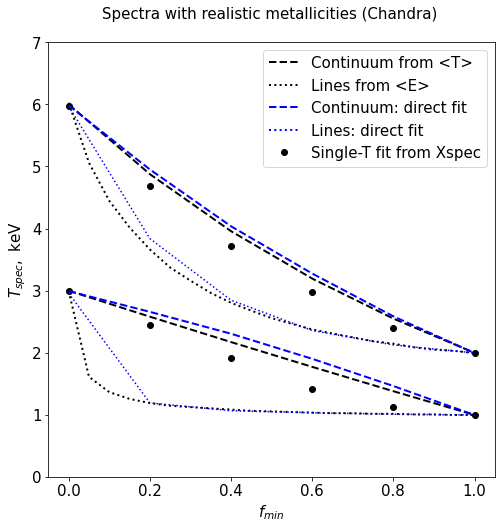

In [104]:
plt.figure(figsize=(8,8))

#telescope = 'Chandra' 
#telescope = 'SRG/eROSITA'

f_min = np.linspace(0, 1, 6)

iks = f_min*0

T_mins = (1.0, 2.0)
T_maxs = (3.0, 6.0)

for T_min, T_max in list(zip(T_mins, T_maxs)):
    
    # line-dominated from <E>
    plot_Tspec_fmin(T_min, T_max, 20, get_data("data/stats_12.dat", show_table=False), naive=False, lstyle=':', cline='black')
    #Tspec_list3 = f_min*0
    #for i in range(0, len(f_min)):
    #    Tspec_list3[i] = get_Tspec_lines(f_min[i], T_min, T_max, get_data("data/stats_12.dat", show_table=False))
    #plt.plot(f_min, Tspec_list3, linestyle=':', color='black')
    
    # line-dominated from direct fit
    Tspec_list4 = Tspec_lines_all_fig5[str(T_min)+'-'+str(T_max)]
    plt.plot(f_min, Tspec_list4, linestyle=':', color='blue')
    
    # continuum from eq. 4,6
    Tspec_list1 = Tspec_cont_all_fig5[str(T_min)+'-'+str(T_max)]
    plt.plot(f_min, Tspec_list1, linestyle = '--', linewidth = 2, color = 'black')
    
    # continuum from direct fit
    Tspec_list5 = Tspec_continuum_fit_fig5[str(T_min)+'-'+str(T_max)]
    plt.plot(f_min, Tspec_list5, linestyle = '--', linewidth = 2, color = 'blue')
    
    # realistic metallicities
    Tspec_list2 = single_T_fit_all_fig5[str(T_min)+'-'+str(T_max)]
    plt.scatter(f_min, Tspec_list2, color='black')
    #Tspec_list = Tspec_cont_all[str(T_min)+'-'+str(T_max)]
    #plt.scatter(np.linspace(0, 1, len(Tspec_list)), Tspec_list, color='black')
    #plt.plot(np.linspace(0, 1, len(Tspec_list)), Tspec_list, color='black', linewidth=1) 
    
handles, labels = plt.gca().get_legend_handles_labels()
line_n = Line2D([], [], label='Continuum from <T>', color='black', linestyle='--', linewidth=2)
line_e = Line2D([], [], label='Lines from <E>', color='black', linestyle=':', linewidth=2)
line_n1 = Line2D([], [], label='Continuum: direct fit', color='blue', linestyle='--', linewidth=2)
line_e1 = Line2D([], [], label='Lines: direct fit', color='blue', linestyle=':', linewidth=2)
dots_f = Line2D([], [], label='Single-T fit from Xspec', color='black', marker='.', linestyle='None', markersize=12)
handles.extend([line_n, line_e, line_n1, line_e1, dots_f])
plt.legend(handles=handles, fontsize=15)
    
plt.ylim(0, 7)
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('$f_{min}$', fontsize = 15)
plt.ylabel('$T_{spec},$ keV', fontsize = 15)
plt.title('Spectra with realistic metallicities ('+telescope+') \n', fontsize = 15)
#plt.savefig('Fig5_eROSITA.png')
plt.show()

## Finally, x( $f_{line}$ )

Figure 6.

In [28]:
def universal_function(flin, delta1, delta2, beta):
    
    return np.exp( -(flin/delta1)**(2*beta) ) * np.exp( -(flin/delta2)**(8) )

In [46]:
telescope = 'Chandra' 
#telescope = 'SRG/eROSITA'

f_min = np.linspace(0, 1, 6)

T_mins = (0.5, 1., 2., 3.)#, 0.5, 1., 2., 3., 0.5, 1., 2., 3.)
T_maxs = (1. , 2., 4., 6.)#, 1.5, 3., 6., 9., 2. , 4., 8., 12.)


Tspec_lines_f6 = {}
Tspec_cont_f6 = {}
single_T_fit_f6 = {}

Flux_lines_f6 = {}
Flux_cont_f6 = {}
Flux_fit_f6 = {}

for metallicity in (0.3, 1.0):

    for T_min, T_max in list(zip(T_mins, T_maxs)):

        name = str(metallicity)+': '+str(T_min)+'-'+str(T_max)

        Tspec_cont_f6[name], Flux_cont_f6[name] = single_T_fit_continuum(T_min, T_max, len(f_min), telescope, 0.7, plot=False, Xplot=False)
        single_T_fit_f6[name], Flux_fit_f6[name] = single_T_realistic(T_min, T_max, len(f_min), metallicity, telescope, plot=False, Xplot=False)
        Tspec_lines_f6[name], Flux_lines_f6[name] = single_T_fit_lines(T_min, T_max, len(f_min), metallicity, telescope, plot = False, Xplot=False)
        
        print(name + ' done')

Plot command list is now empty
Plot command list is now empty
Plot command list is now empty
Plot command list is now empty
Plot command list is now empty
Plot command list is now empty
0.3: 0.5-1.0 done
Plot command list is now empty
Plot command list is now empty
Plot command list is now empty
Plot command list is now empty
Plot command list is now empty
Plot command list is now empty
0.3: 1.0-2.0 done
Plot command list is now empty
Plot command list is now empty
Plot command list is now empty
Plot command list is now empty
Plot command list is now empty
Plot command list is now empty
0.3: 2.0-4.0 done
Plot command list is now empty
Plot command list is now empty
Plot command list is now empty
Plot command list is now empty
Plot command list is now empty
Plot command list is now empty
0.3: 3.0-6.0 done
Plot command list is now empty
Plot command list is now empty
Plot command list is now empty
Plot command list is now empty
Plot command list is now empty
Plot command list is now empt

In [42]:
#print_values([Flux_lines_f6, Flux_cont_f6, Flux_fit_f6])
#print_values([Tspec_lines_f6, Tspec_cont_f6, single_T_fit_f6])

#for key in Flux_lines_f6.keys():
#    print(key, 'keV')
#    print([vl*10**10 for vl in Flux_lines_f6[key]], '\n')
#    print([vl*10**10 for vl in Flux_cont_f6[key]], '\n')
#    print([(vl1 + vl2)*10**10 for vl1, vl2 in zip(Flux_lines_f6[key], Flux_cont_f6[key])], '\n')
#    print([vl*10**10 for vl in Flux_fit_f6[key]], '\n')

F_cnt + F_lin = F_sum =?= F_fit
3.11 + 6.06 = 9.17 =?= 9.17 ....... f_line = 0.66, x = 0.37
2.68 + 5.97 = 8.65 =?= 8.70 ....... f_line = 0.69, x = -0.46
2.27 + 5.94 = 8.21 =?= 8.28 ....... f_line = 0.72, x = -0.38
1.86 + 6.06 = 7.92 =?= 8.01 ....... f_line = 0.77, x = -0.61
1.46 + 6.38 = 7.84 =?= 7.84 ....... f_line = 0.81, x = -0.40
1.08 + 6.55 = 7.64 =?= 7.64 ....... f_line = 0.86, x = 0.73


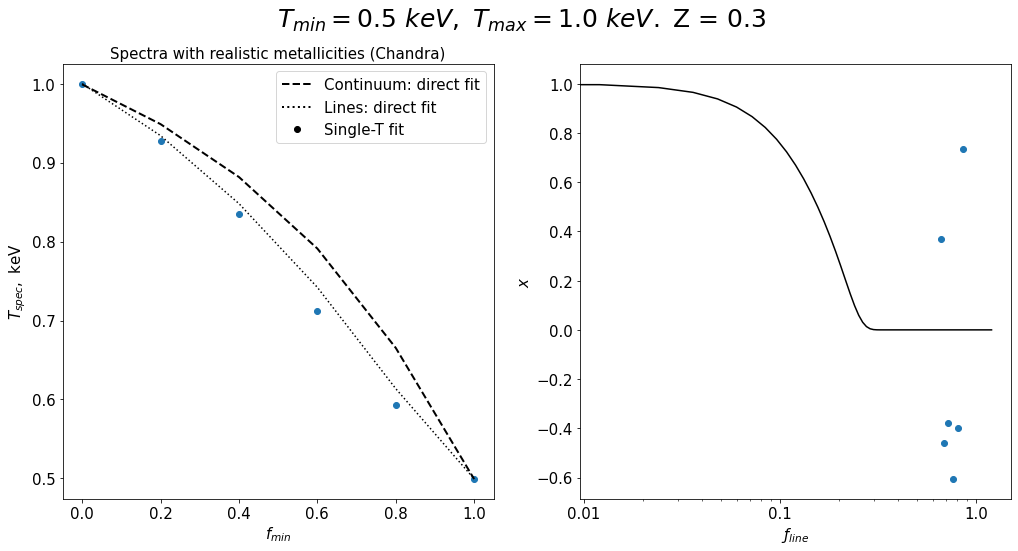

F_cnt + F_lin = F_sum =?= F_fit
6.51 + 1.86 = 8.37 =?= 8.36 ....... f_line = 0.22, x = 0.19
5.80 + 2.30 = 8.10 =?= 8.04 ....... f_line = 0.28, x = 0.32
5.10 + 3.18 = 8.28 =?= 8.00 ....... f_line = 0.38, x = 0.13
4.41 + 4.16 = 8.56 =?= 8.31 ....... f_line = 0.49, x = 0.05
3.74 + 5.12 = 8.86 =?= 8.73 ....... f_line = 0.58, x = 0.05
3.10 + 6.06 = 9.17 =?= 9.17 ....... f_line = 0.66, x = -0.06


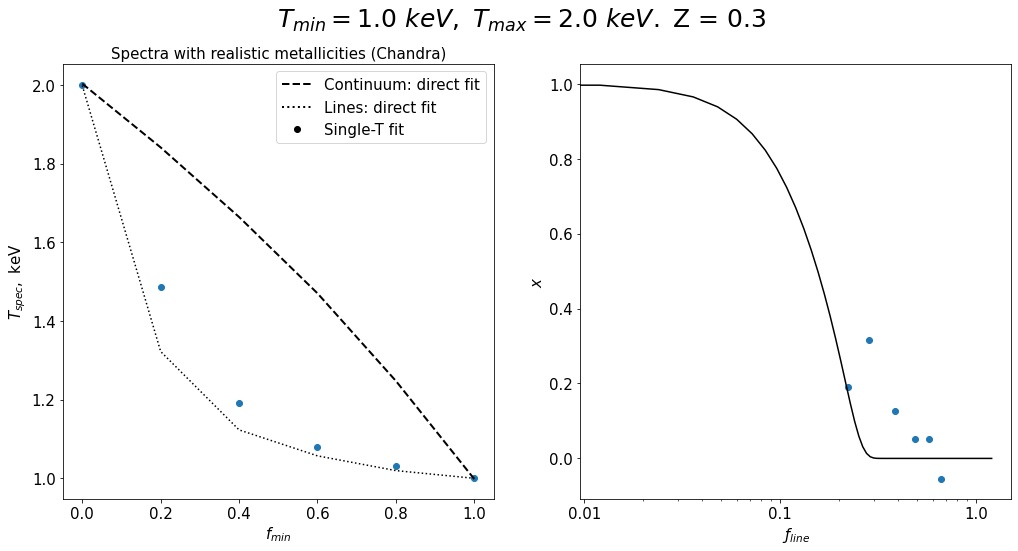

F_cnt + F_lin = F_sum =?= F_fit
10.84 + 1.42 = 12.26 =?= 12.27 ....... f_line = 0.12, x = 1.15
9.91 + 1.44 = 11.35 =?= 11.41 ....... f_line = 0.13, x = 0.79
9.01 + 1.51 = 10.52 =?= 10.58 ....... f_line = 0.14, x = 0.78
8.15 + 1.60 = 9.76 =?= 9.79 ....... f_line = 0.16, x = 0.74
7.31 + 1.73 = 9.03 =?= 9.04 ....... f_line = 0.19, x = 0.72
6.50 + 1.86 = 8.37 =?= 8.37 ....... f_line = 0.22, x = 7.95


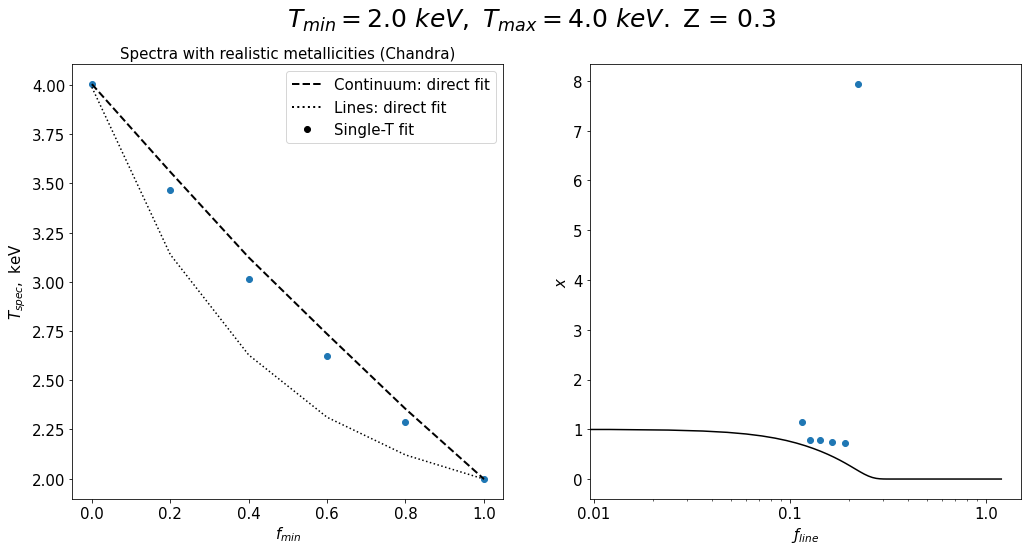

F_cnt + F_lin = F_sum =?= F_fit
13.23 + 1.35 = 14.57 =?= 14.58 ....... f_line = 0.09, x = 0.33
12.31 + 1.37 = 13.68 =?= 13.70 ....... f_line = 0.10, x = 0.86
11.44 + 1.39 = 12.83 =?= 12.85 ....... f_line = 0.11, x = 0.80
10.60 + 1.41 = 12.01 =?= 12.03 ....... f_line = 0.12, x = 0.79
9.77 + 1.45 = 11.22 =?= 11.24 ....... f_line = 0.13, x = 0.79
8.99 + 1.49 = 10.48 =?= 10.48 ....... f_line = 0.14, x = 0.41


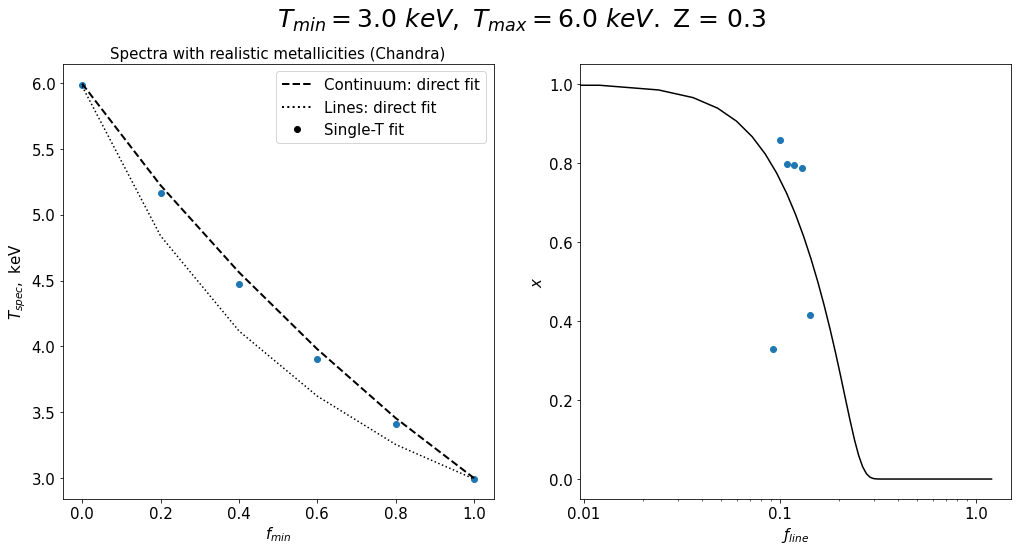

F_cnt + F_lin = F_sum =?= F_fit
3.10 + 20.20 = 23.30 =?= 23.32 ....... f_line = 0.87, x = -0.01
2.69 + 19.92 = 22.61 =?= 22.72 ....... f_line = 0.88, x = -0.46
2.27 + 19.81 = 22.08 =?= 22.26 ....... f_line = 0.90, x = -0.33
1.86 + 20.21 = 22.08 =?= 22.39 ....... f_line = 0.92, x = -0.62
1.46 + 21.27 = 22.73 =?= 22.80 ....... f_line = 0.94, x = -0.45
1.08 + 21.83 = 22.91 =?= 22.92 ....... f_line = 0.95, x = -0.35


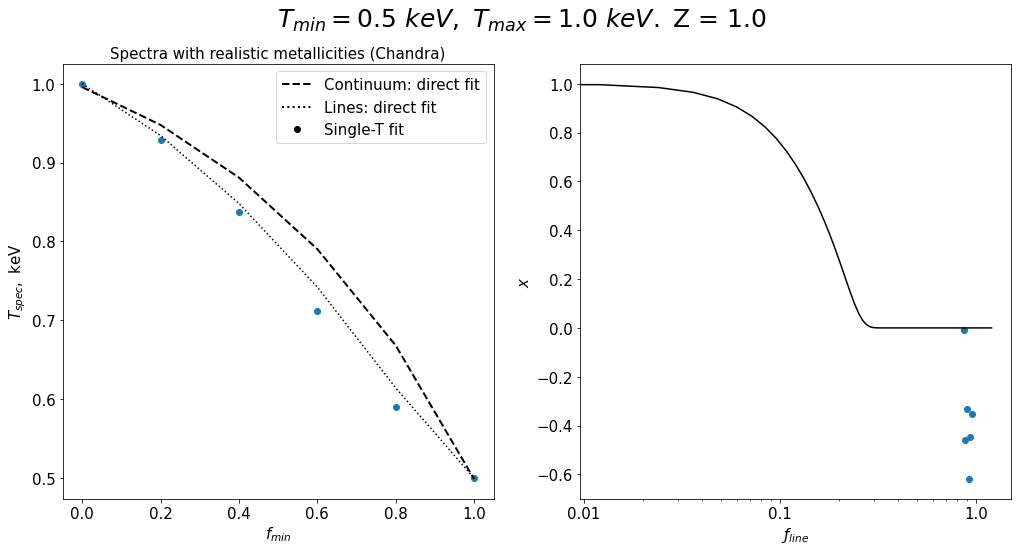

F_cnt + F_lin = F_sum =?= F_fit
6.51 + 6.21 = 12.72 =?= 12.72 ....... f_line = 0.49, x = 0.47
5.80 + 7.65 = 13.44 =?= 13.63 ....... f_line = 0.57, x = 0.01
5.10 + 10.62 = 15.71 =?= 15.75 ....... f_line = 0.68, x = -0.00
4.40 + 13.85 = 18.25 =?= 18.23 ....... f_line = 0.76, x = -0.01
3.74 + 17.07 = 20.81 =?= 20.79 ....... f_line = 0.82, x = -0.01
3.10 + 20.21 = 23.31 =?= 23.32 ....... f_line = 0.87, x = -0.08


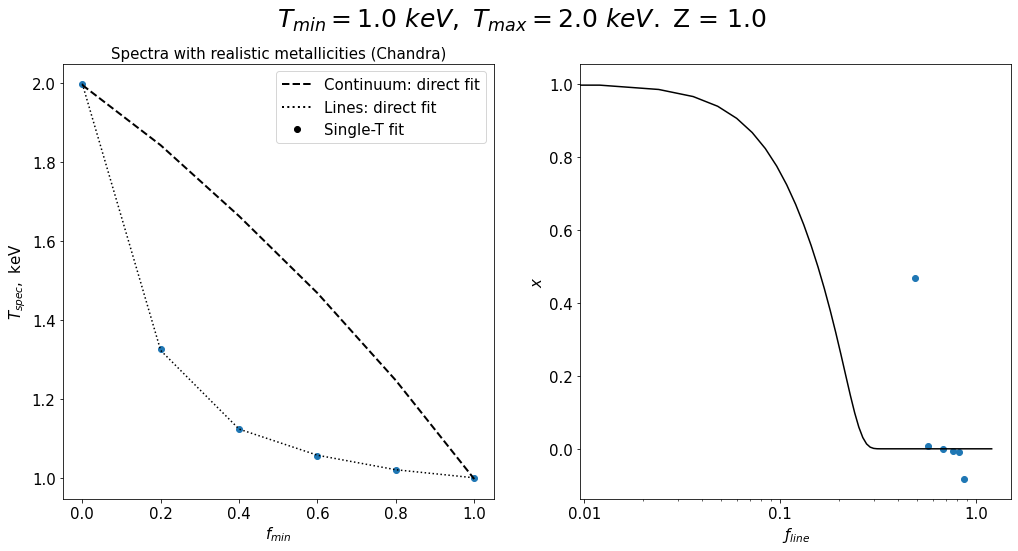

F_cnt + F_lin = F_sum =?= F_fit
10.83 + 4.74 = 15.57 =?= 15.55 ....... f_line = 0.30, x = -44.47
9.92 + 4.84 = 14.76 =?= 14.84 ....... f_line = 0.33, x = 0.52
9.02 + 5.03 = 14.05 =?= 14.16 ....... f_line = 0.36, x = 0.49
8.14 + 5.33 = 13.47 =?= 13.54 ....... f_line = 0.40, x = 0.45
7.31 + 5.75 = 13.06 =?= 13.08 ....... f_line = 0.44, x = 0.40
6.50 + 6.21 = 12.71 =?= 12.72 ....... f_line = 0.49, x = -0.20


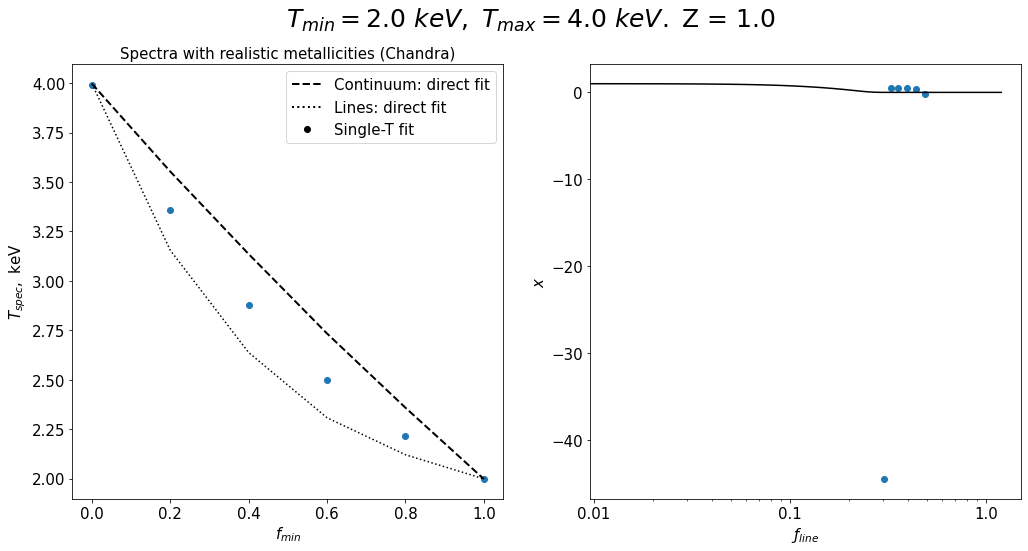

F_cnt + F_lin = F_sum =?= F_fit
13.22 + 4.50 = 17.73 =?= 17.69 ....... f_line = 0.25, x = -3.08
12.32 + 4.59 = 16.91 =?= 16.87 ....... f_line = 0.27, x = 0.50
11.44 + 4.64 = 16.08 =?= 16.08 ....... f_line = 0.29, x = 0.49
10.59 + 4.72 = 15.31 =?= 15.32 ....... f_line = 0.31, x = 0.49
9.78 + 4.83 = 14.60 =?= 14.63 ....... f_line = 0.33, x = 0.50
8.99 + 4.99 = 13.98 =?= 13.96 ....... f_line = 0.36, x = 1.75


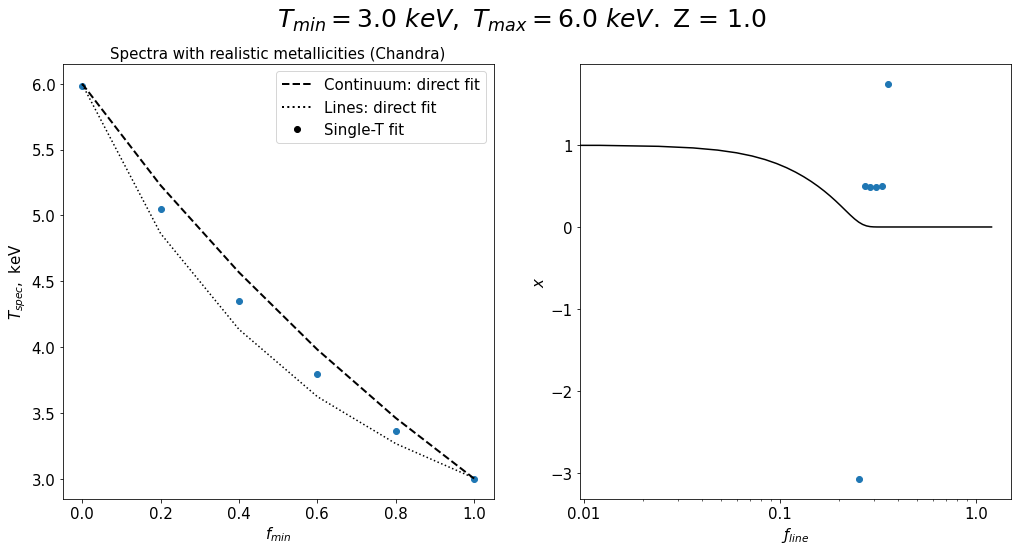

In [47]:
iks_all = []
fline_all = []

for metallicity in (0.3, 1.0):

    for T_min, T_max in list(zip(T_mins, T_maxs)):

        name_key = str(metallicity)+': '+str(T_min)+'-'+str(T_max)

        plt.figure(figsize=(17,8))
        plt.suptitle(f'$T_{{min}}={T_min} \ keV, \ T_{{max}}={T_max} \ keV.$ Z = '+str(metallicity)+'\n \n', fontsize = 25)

        plt.subplot(1,2,1)
        # continuum
        Tspec_list1 = Tspec_cont_f6[name_key]
        plt.plot(f_min, Tspec_list1, linestyle = '--', linewidth = 2, color = 'black')

        # realistic metallicities
        Tspec_list2 = single_T_fit_f6[name_key]
        plt.scatter(f_min, Tspec_list2)#, color='black')

        #line-dominated
        Tspec_list3 = Tspec_lines_f6[name_key]
        plt.plot(f_min, Tspec_list3, linestyle=':', color='black')

        num_iks = [tsp - tli for tsp, tli in zip(Tspec_list2, Tspec_list3)]
        denom_iks = [tco - tli for tco, tli in zip(Tspec_list1, Tspec_list3)]
        iks = [numx/denomx for numx, denomx in zip(num_iks, denom_iks)]

        Flux_list1 = Flux_cont_f6[name_key]
        Flux_list2 = Flux_fit_f6[name_key]
        Flux_list3 = Flux_lines_f6[name_key]

        #num_fline = Flux_list3
        #denom_fline = [Fli + Fco for Fli, Fco in zip(Flux_list3, Flux_list1)]
        #denom_fline1 = Flux_list2
        #fline = [numf/denomf for numf, denomf in zip(num_fline, denom_fline)]

        fline = [Fli/(Fli + Fco) for Fli, Fco in zip(Flux_list3, Flux_list1)]
        #fline = [Fli/Fsum for Fli, Fsum in zip(Flux_list3, Flux_list2)]

        print('F_cnt + F_lin = F_sum =?= F_fit')
        for i in range(0, len(f_min)):
            print(f'{Flux_list1[i]*10**10:.2f} + {Flux_list3[i]*10**10:.2f} = {Flux_list1[i]*10**10 + Flux_list3[i]*10**10:.2f} =?= {Flux_list2[i]*10**10:.2f} ....... f_line = {fline[i]:.2f}, x = {iks[i]:.2f}')

        iks_all.append(iks)
        fline_all.append(fline)

        handles, labels = plt.gca().get_legend_handles_labels()
        line_n = Line2D([], [], label='Continuum: direct fit', color='black', linestyle='--', linewidth=2)
        line_e = Line2D([], [], label='Lines: direct fit', color='black', linestyle=':', linewidth=2)
        dots_f = Line2D([], [], label='Single-T fit', color='black', marker='.', linestyle='None', markersize=12)
        handles.extend([line_n, line_e, dots_f])
        plt.legend(handles=handles, fontsize=15)

        #plt.ylim(0, 12.1)
        plt.xticks(size=15)
        plt.yticks(size=15)
        plt.xlabel('$f_{min}$', fontsize = 15)
        plt.ylabel('$T_{spec},$ keV', fontsize = 15)
        plt.title('Spectra with realistic metallicities ('+telescope+')', fontsize = 15)
        #plt.savefig('Fig5_eROSITA.png')

        plt.subplot(1,2,2)
        #plt.plot(f_min, iks, color='red')
        #plt.plot(f_min, fline, color='blue')

        plt.scatter(fline, iks)
        ii = np.linspace(0, 1.2, 101)
        plt.plot(ii, universal_function(ii, 0.19, 0.25, 1.00), color='black', linestyle='-', label = 'Desired')
        plt.xscale('log')
        #plt.ylim(-0.1, 1.2)
        plt.xticks([0.01, 0.1, 1.0], [0.01, 0.1, 1.0], size=15)
        plt.yticks(size=15)
        plt.xlabel('$ƒ_{line}$', fontsize = 15)
        plt.ylabel('$x$', fontsize = 15)
        #plt.title('Spectra with realistic metallicities ('+telescope+') \n', fontsize = 15)
        plt.show()

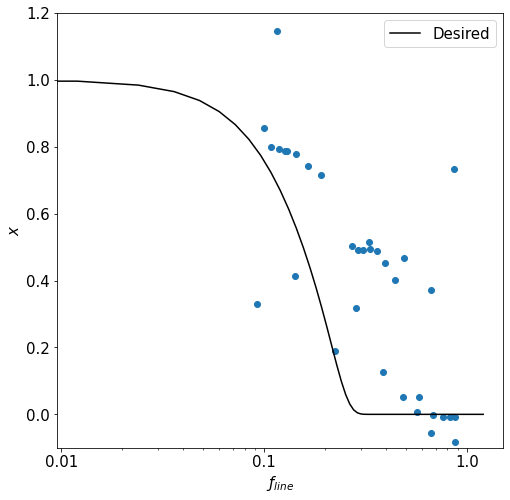

In [48]:
plt.figure(figsize=(8,8))
        
plt.scatter(fline_all, iks_all)

ii = np.linspace(0, 1.2, 101)
plt.plot(ii, universal_function(ii, 0.19, 0.25, 1.00), color='black', linestyle='-', label = 'Desired')

plt.legend(fontsize=15)
plt.xscale('log')
plt.ylim(-0.1, 1.2)
plt.xticks([0.01, 0.1, 1.0], [0.01, 0.1, 1.0], size=15)
plt.yticks(size=15)
plt.xlabel('$ƒ_{line}$', fontsize = 15)
plt.ylabel('$x$', fontsize = 15)
#plt.title('Spectra with realistic metallicities ('+telescope+') \n', fontsize = 15)
#plt.savefig('Fig6_'+telescope+'.png')
plt.show()

Some results:

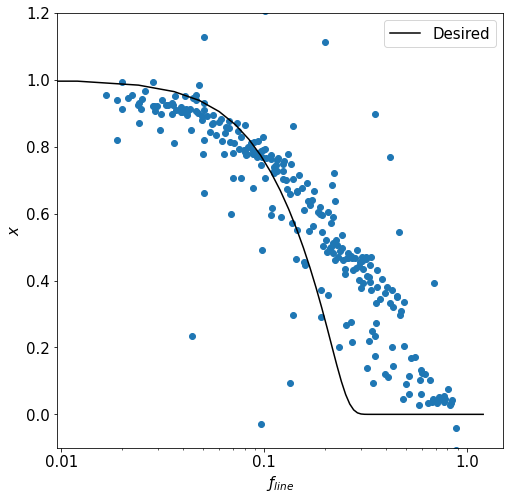

In [154]:
plt.figure(figsize=(8,8))

#telescope = 'Chandra' 
#telescope = 'SRG/eROSITA'

iks_all = []
fline_all = []

T_mins = (1., 2., 3., 1., 2., 3., 1., 2., 3.)
T_maxs = (2., 4., 6., 3., 6., 9., 4., 8., 12.)

for metallicity in (0.1, 0.3, 1.0):

    for T_min, T_max in list(zip(T_mins, T_maxs)):
        
        name_key = str(metallicity)+': '+str(T_min)+'-'+str(T_max)

        # continuum
        Tspec_list1 = Tspec_cont_f6[name_key]
        Flux_list1 = Flux_cont_f6[name_key]

        # realistic metallicities
        Tspec_list2 = single_T_fit_f6[name_key]
        Flux_list2 = Flux_fit_f6[name_key]

        #line-dominated
        Tspec_list3 = Tspec_lines_f6[name_key]
        Flux_list3 = Flux_lines_f6[name_key]

        num_iks = [tsp - tli for tsp, tli in zip(Tspec_list2, Tspec_list3)]
        denom_iks = [tco - tli for tco, tli in zip(Tspec_list1, Tspec_list3)]
        iks = [numx/denomx for numx, denomx in zip(num_iks, denom_iks)]

        num_fline = Flux_list3
        denom_fline = Flux_list2 #[Fli + Fco for Fli, Fco in zip(Flux_list3, Flux_list1)]
        fline = [numf/denomf for numf, denomf in zip(num_fline, denom_fline)]

        iks_all.append(iks)
        fline_all.append(fline)

        #plt.scatter(fline, iks)

plt.scatter(fline_all, iks_all)


#plt.scatter(fline_all_1, iks_all_1, label = 'Z = 0.1')
#plt.scatter(fline_all_2, iks_all_2, label = 'Z = 0.3')
#plt.scatter(fline_all_3, iks_all_3, label = 'Z = 1.0')

#for ii in np.linspace(0, 1.2, 101):
ii = np.linspace(0, 1.2, 101)
plt.plot(ii, universal_function(ii, 0.19, 0.25, 1.00), color='black', linestyle='-', label = 'Desired')

#handles, labels = plt.gca().get_legend_handles_labels()
#line_n = Line2D([], [], label='Continuum', color='black', linestyle='--', linewidth=2)
#line_e = Line2D([], [], label='Lines', color='black', linestyle=':', linewidth=2)
#dots_f = Line2D([], [], label='Single-T fit from Xspec', color='black', marker='.', linestyle='None', markersize=12)
#handles.extend([line_n, line_e, dots_f])
#plt.legend(handles=handles, fontsize=15)

plt.legend(fontsize=15)
plt.xscale('log')
plt.ylim(-0.1, 1.2)
plt.xticks([0.01, 0.1, 1.0], [0.01, 0.1, 1.0], size=15)
plt.yticks(size=15)
plt.xlabel('$ƒ_{line}$', fontsize = 15)
plt.ylabel('$x$', fontsize = 15)
#plt.title('Spectra with realistic metallicities ('+telescope+') \n', fontsize = 15)
#plt.savefig('Fig6_'+telescope+'.png')
plt.show()